# Results notebook
---
Notebook for results

## Set up

In [14]:
import os
import pandas as pd
import numpy as np
import get_data 
import get_patient
import get_PPI
import get_network_analysis
from get_data import UC_bin_97_5, CD_bin_97_5, CD_bin_99, UC_bin_99, CD_bin_95, UC_bin_95, genepy_df
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [15]:
from get_data import genepy_bin_95, IBDU_bin_95, UC_CD_bin_95, NOT_IBD_95

## Remove patients not CD or UC


In [37]:
CD = get_data.get_diagnosis_df(genepy_bin_95, 'CD')
UC = get_data.get_diagnosis_df(genepy_bin_95, 'UC') 

CD_UC_only = pd.concat([CD,UC])

In [50]:
CD_UC_only.

,A1BG,A1CF,A2ML1,A2M,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
IID,,,,,,,,,,,,,,,,,,,,,
AP0013,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0276,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SORL0037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SORL0038,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Represent Binarised method between groups
total / CD / UC

In [42]:
CD_bin_head = get_data.get_top_bin_sum(CD_bin_95)
UC_bin_head = UC_bin_95[get_data.get_top_bin_sum(CD_bin_95).index].sum()
genepy_bin_head = CD_UC_only[get_data.get_top_bin_sum(CD_bin_95).index].sum()



All_3 = pd.concat([CD_bin_head, UC_bin_head, genepy_bin_head],axis=1)
All_3.columns = ['CD n=681', 'UC n=368', 'Total n=1049']

In [43]:
All_3

,CD n=681,UC n=368,Total n=1049
NOD2,47,7,54
WDFY4,46,8,54
ARL5C,43,12,55
PHPT1,43,10,53
SETD2,43,11,54
FAM161A,43,11,54
RNF43,42,10,52
C7orf31,42,9,51
SIDT1,42,10,52
METTL11B,42,8,50


### Create latext file

In [49]:
All_3.to_csv('all_3.csv')

In [48]:
with open('table.tbl','w') as f:
    f.write(All_3.to_latex(index=True))

In [46]:
# Set column header to bold title case
All_3.columns = (All_3.columns.to_series().apply(lambda r: "\\textbf}".format(r.replace("_", " ").title())))

# Write to file
with open(os.path.splitext(os.path.basename(__file__))[0] + ".tbl", "w") as f:
    format = "l" + \
    "@{\hskip 12pt}" +\
    4*"S[table-format = 2.2]"
    

ValueError: Single '}' encountered in format string

### Mann-Whitney U test 
compare between groups - check binarise method is significant 

In [16]:
# remove PDE11A
CD_bin_95 = CD_bin_95.drop(['PDE11A'], axis=1)
UC_bin_95 = UC_bin_95.drop(['PDE11A'], axis=1)

In [21]:
# two lists of values 
CD_patients = get_data.get_top_bin_sum(CD_bin_95, head=None).values
UC_patients = UC_bin_95[get_data.get_top_bin_sum(CD_bin_95, head=None).index].sum().values

In [27]:
UC_patients

array([ 7,  8, 12, ...,  1,  0,  1])

In [22]:
scipy.stats.mannwhitneyu(CD_patients, UC_patients)

MannwhitneyuResult(statistic=172702956.5, pvalue=0.0)

In [42]:
UC_patients = get_data.get_top_bin_sum(UC_bin_95, head=None)
UC_patients.index[UC_patients.index.duplicated()]

Index(['PDE11A'], dtype='object')

Wilcoxon test 

In [24]:
# CD vs UC
scipy.stats.wilcoxon(CD_patients, UC_patients)

WilcoxonResult(statistic=6993881.0, pvalue=0.0)

## Histograms to show percentiles

In [56]:
genepy_df = get_data.remove_ensembl_IDs(genepy_df)

In [57]:
genepy_df

,A1BG,A1CF,A2ML1,A2M,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Samid,,,,,,,,,,,,,,,,,,,,,
AP0013,0.0,0.0,0.000000,0.91923,1.198477,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,1.118891,0.0,0.000000,0.0,0.0,0.000000,0.091227,0.0
AP0030,0.0,0.0,0.306114,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.362662,0.0,0.000000,0.0,0.0,0.000000,0.387801,0.0
AP0045,0.0,0.0,0.306114,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.091227,0.0
AP0046,0.0,0.0,0.424634,0.00000,0.000000,0.0,0.000000,0.0,0.000000,2.734173,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.091227,0.0
AP0055,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.828678,0.0,0.000000,0.000000,...,0.0,0.000000,0.362662,0.0,0.000000,0.0,0.0,0.000000,0.602395,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0038,0.0,0.0,0.424634,0.00000,0.000000,0.0,0.000000,0.0,1.705401,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
SORL0039,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.631974,...,0.0,2.670446,0.613502,0.0,1.926769,0.0,0.0,0.000000,0.000000,0.0
SORL0040,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,2.734173,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.312618,0.511169,0.0


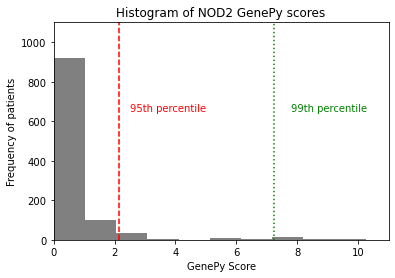

In [81]:
NOD2_series = genepy_df["NOD2"]
n, bins, patches = plt.hist(NOD2_series, color='grey')


plt.xlabel('GenePy Score')
plt.ylabel('Frequency of patients')
plt.title('Histogram of NOD2 GenePy scores')
plt.xlim(0, 11)
plt.ylim(0, 1100)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NOD2"],95), 
            color='r', 
            linestyle='--')
plt.text(2.5, 650, r'95th percentile',
         color='r')
plt.axvline(np.percentile(genepy_df["NOD2"],99), 
            color='g',
            linestyle=':')
plt.text(7.8, 650, r'99th percentile',
         color='g')
plt.savefig("NOD2_Percentile.png",dpi=300)


In [ ]:
np.percentile(

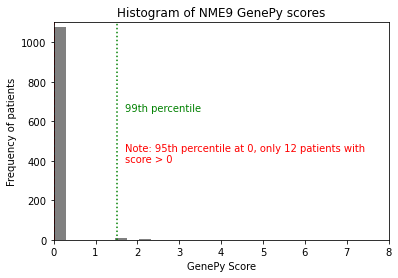

In [82]:
NME9_series = genepy_df["NME9"]
n, bins, patches = plt.hist(NME9_series, color='grey')


plt.xlabel('GenePy Score')
plt.ylabel('Frequency of patients')
plt.title('Histogram of NME9 GenePy scores')
plt.xlim(0, 8)
plt.ylim(0, 1100)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NME9"],95),
            color='r',
            linestyle='--')
plt.text(1.7, 400, 'Note: 95th percentile at 0, only 12 patients with\nscore > 0', color='r', wrap=True)
plt.axvline(np.percentile(genepy_df["NME9"],99), 
            color='g',
            linestyle=':')
plt.text(1.7, 650, r'99th percentile', color='g')
plt.savefig("NME9_Percentile.png",dpi=300)


In [86]:
np.percentile(genepy_df["NOD2"], 99)

7.249239905477129

## Represent Percentiles/Distrubution between cohorts

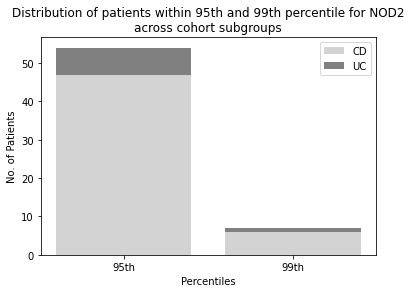

In [140]:
# NOD2
x = ['95th', '99th']
CD = [47, 6]
UC = [7, 1]
UIBD = [0,0]
UC_CD = [0,0]
NOT_IBD = [0,0]

plt.bar(x, CD, color='lightgrey')
plt.bar(x, UC, bottom=CD, color='grey')
plt.xlabel("Percentiles")
plt.ylabel("No. of Patients")
plt.legend(["CD","UC","UIBD","UC_CD", "NOT_IBD"])
plt.title("Distribution of patients within 95th and 99th percentile for NOD2\nacross cohort subgroups")
plt.savefig("NOD2_dist.png",dpi=300)

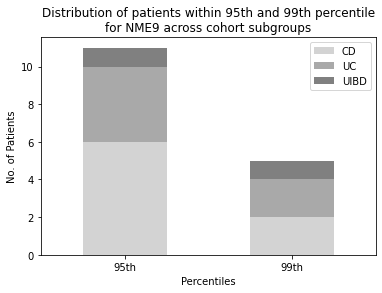

In [138]:
# NME9
df = pd.DataFrame([['95th', 6, 4, 1],
                   ['99th', 2, 2, 1]],
                  columns=['Percentile', 'CD', 'UC', 'UIBD'])
'''
plt.bar(x, CD, hatch='///')
plt.bar(x, UC, bottom=CD, )
plt.bar(x, UIBD, bottom=CD+UC, color='b')
#plt.bar(x, NOT_IBD, bottom=CD+UC+UIBD,color='gray')
'''
df.plot(x='Percentile', kind='bar', stacked=True, color=['lightgrey','darkgrey','grey'])
plt.xlabel("Percentiles")
plt.ylabel("No. of Patients")
#plt.legend(["CD","UC","UIBD", "NOT_IBD"])
plt.title("Distribution of patients within 95th and 99th percentile\nfor NME9 across cohort subgroups")
plt.xticks(rotation = 360) 
plt.savefig("NME3_dist.png",dpi=300)

## Network displaying node with the highest number of 

In [18]:
from get_network_analysis import CD_95_MG, UC_95_MG, CD_95_GL, UC_95_GL 

In [19]:
import networkx as nx
import cytoscape

You are connected to Cytoscape!


### Patients
<2 removed 

In [8]:
CD_95_MG.number_of_edges('NOD2')

0

In [6]:
CD_95_MG

remove = [node for node,degree in dict(CD_95_MG.degree()).items() if degree < 4]
G = CD_95_MG.remove_nodes_from(remove)

In [10]:
cytoscape.view_networkx_in_cytoscape(CD_95_MG)

Applying default style...
Applying preferred layout


{'networkSUID': 31185}

In [94]:
G.number_of_nodes()

AttributeError: 'NoneType' object has no attribute 'number_of_nodes'

### Degree
Degree <2 removed

In [ ]:
import get_network_analysis
from get_network_analysis import CD_95_ND, UC_95_ND, CD_99_MG, UC_99_MG, CD_99_ND, UC_99_ND

In [16]:
top_CD_bin_95 = get_network_analysis.get_top_genes(CD_bin_95, 30)
top_UC_bin_95 = get_network_analysis.get_top_genes(UC_bin_95, 30)

top_CD_bin_99 = get_network_analysis.get_top_genes(CD_bin_99, 30)
top_UC_bin_99 = get_network_analysis.get_top_genes(UC_bin_99, 30)

In [19]:
def create_boxplot(data, subset, name, save=False):
    '''
    Function to generate a boxplot from a dataframe. Requires a subset index to limit number of entries.
    '''
    sns.set(rc = {'figure.figsize':(40,30)})
    degree_boxplot = data[subset].boxplot(whis=(0, 100))
    degree_boxplot.tick_params(axis='x',
                               labelrotation=90)
    degree_boxplot.tick_params(labelsize=20)
    degree_boxplot.set_title('Distribution of node degree in ' + name, 
                             size=40)
    if save == False:
        pass
    else: 
        degree_boxplot.figure.savefig(name+".png")
    return plt.show(degree_boxplot)



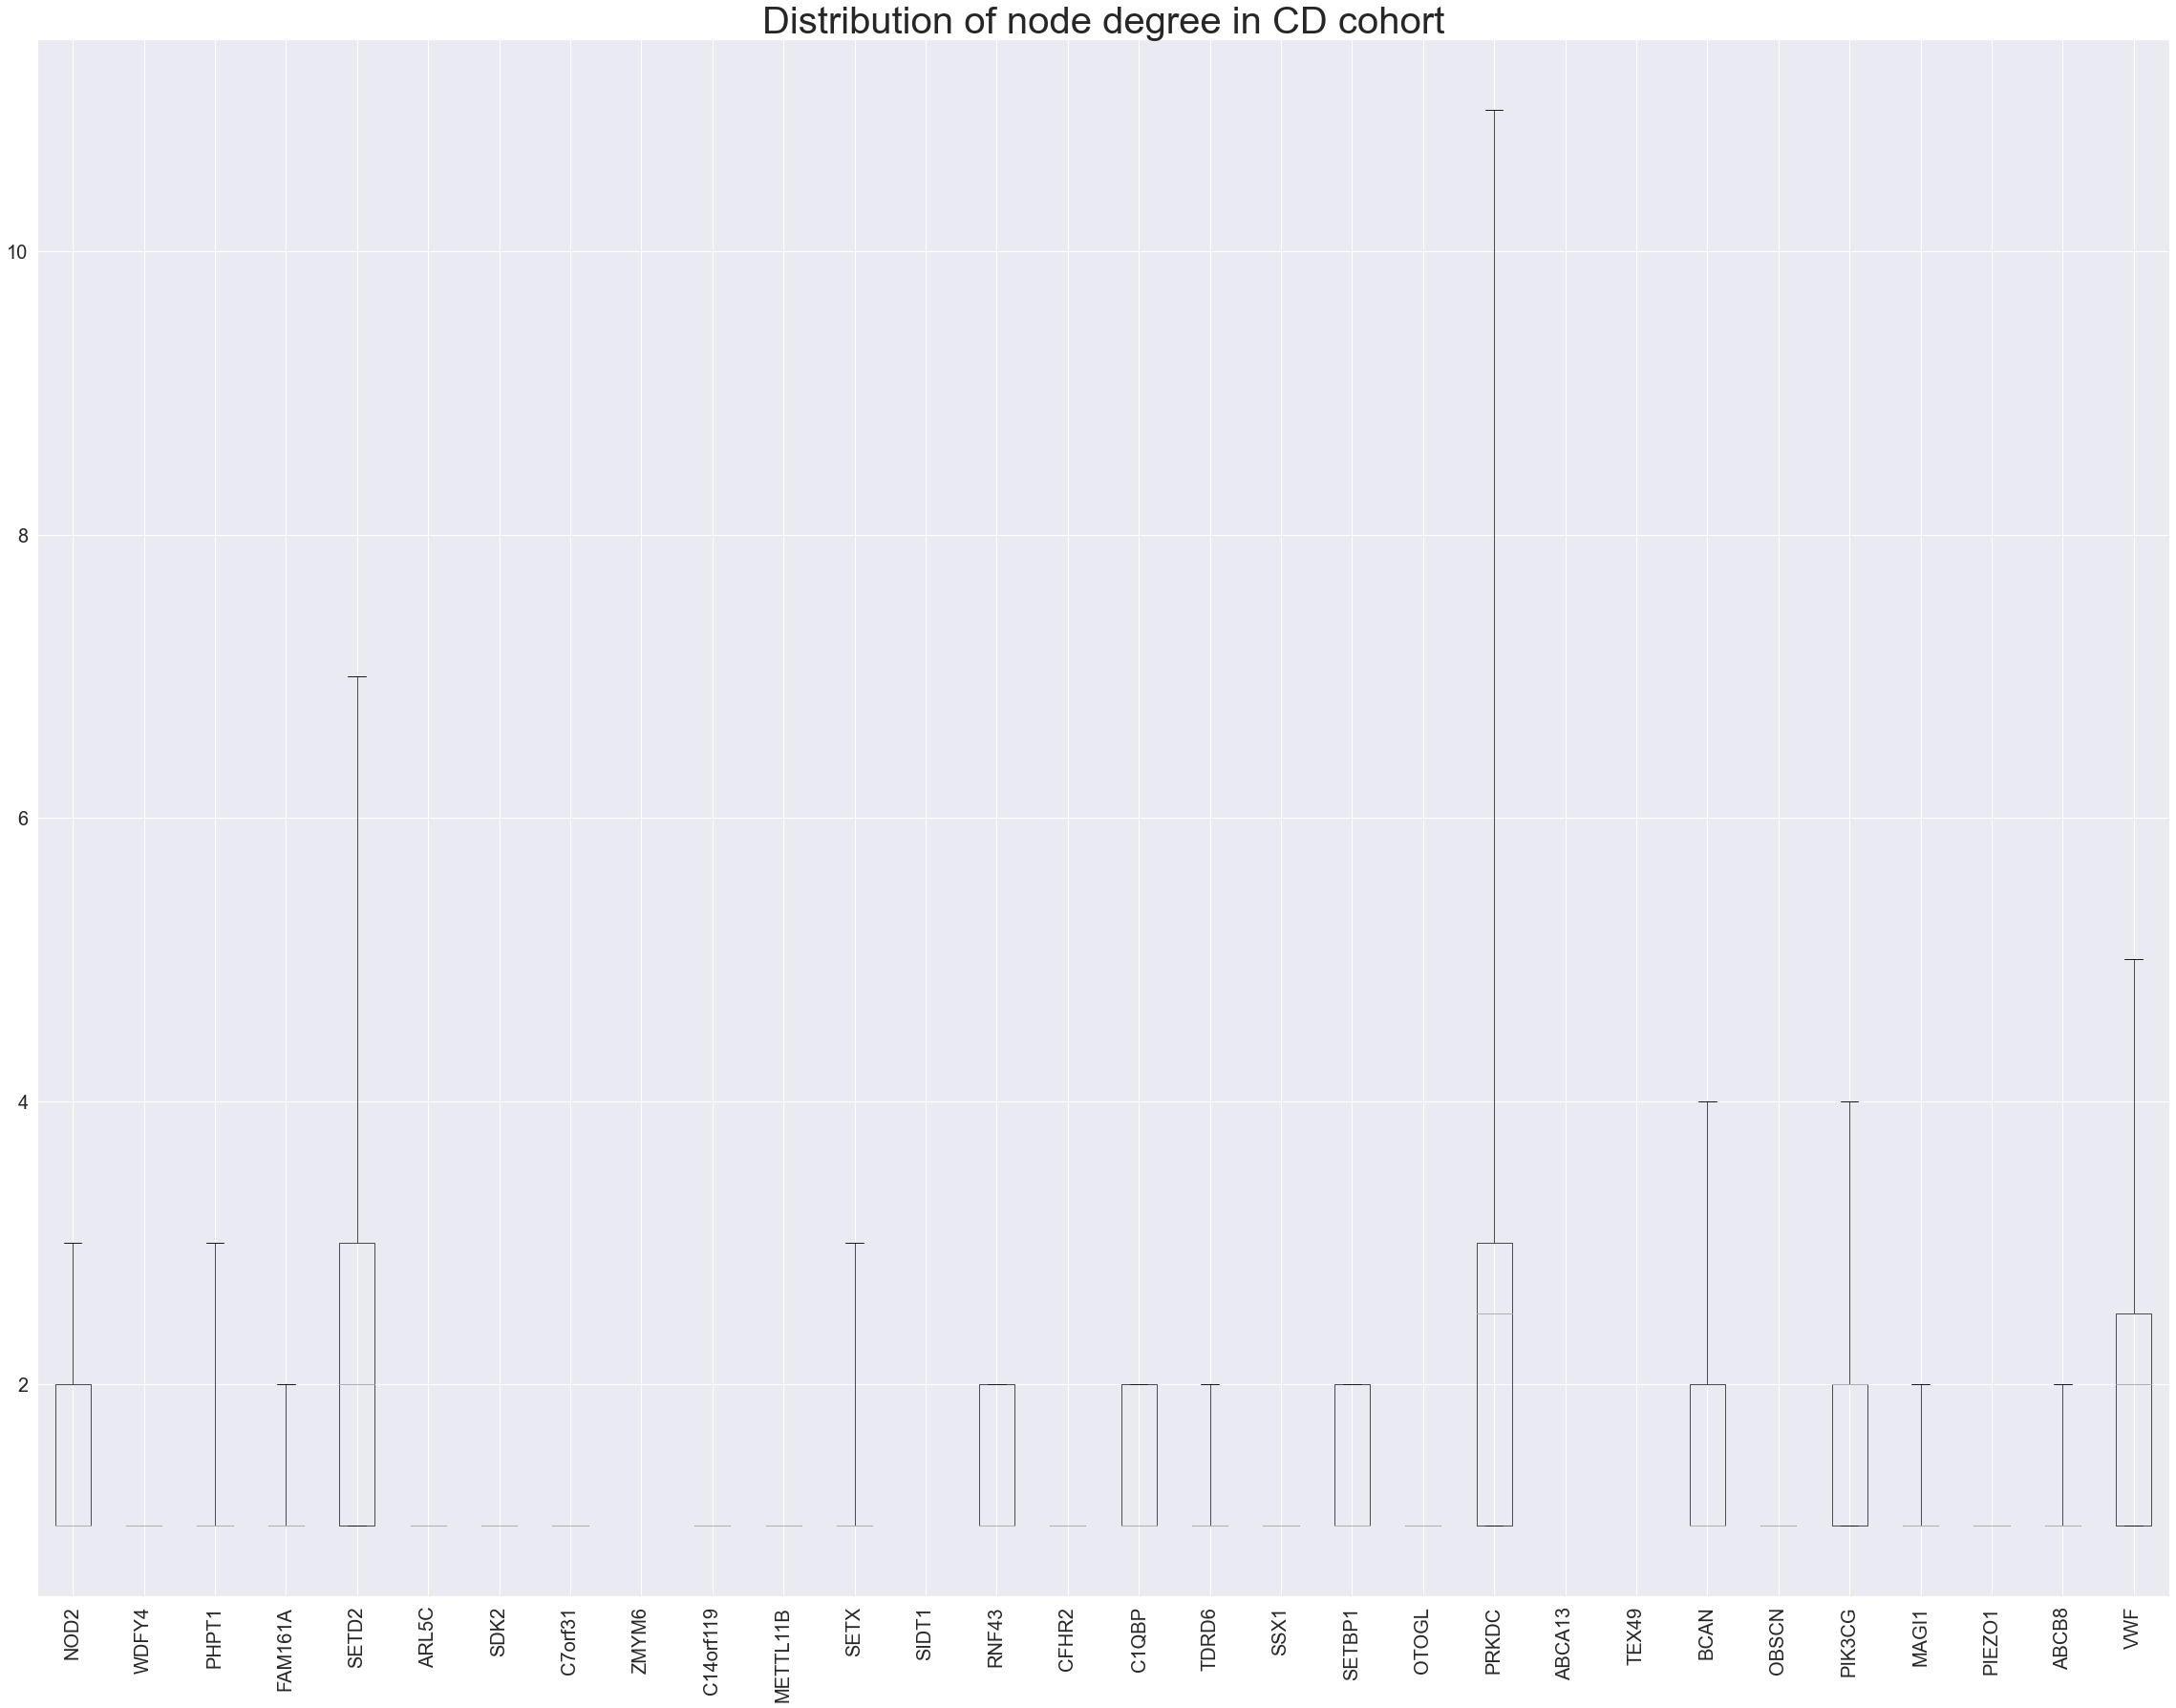

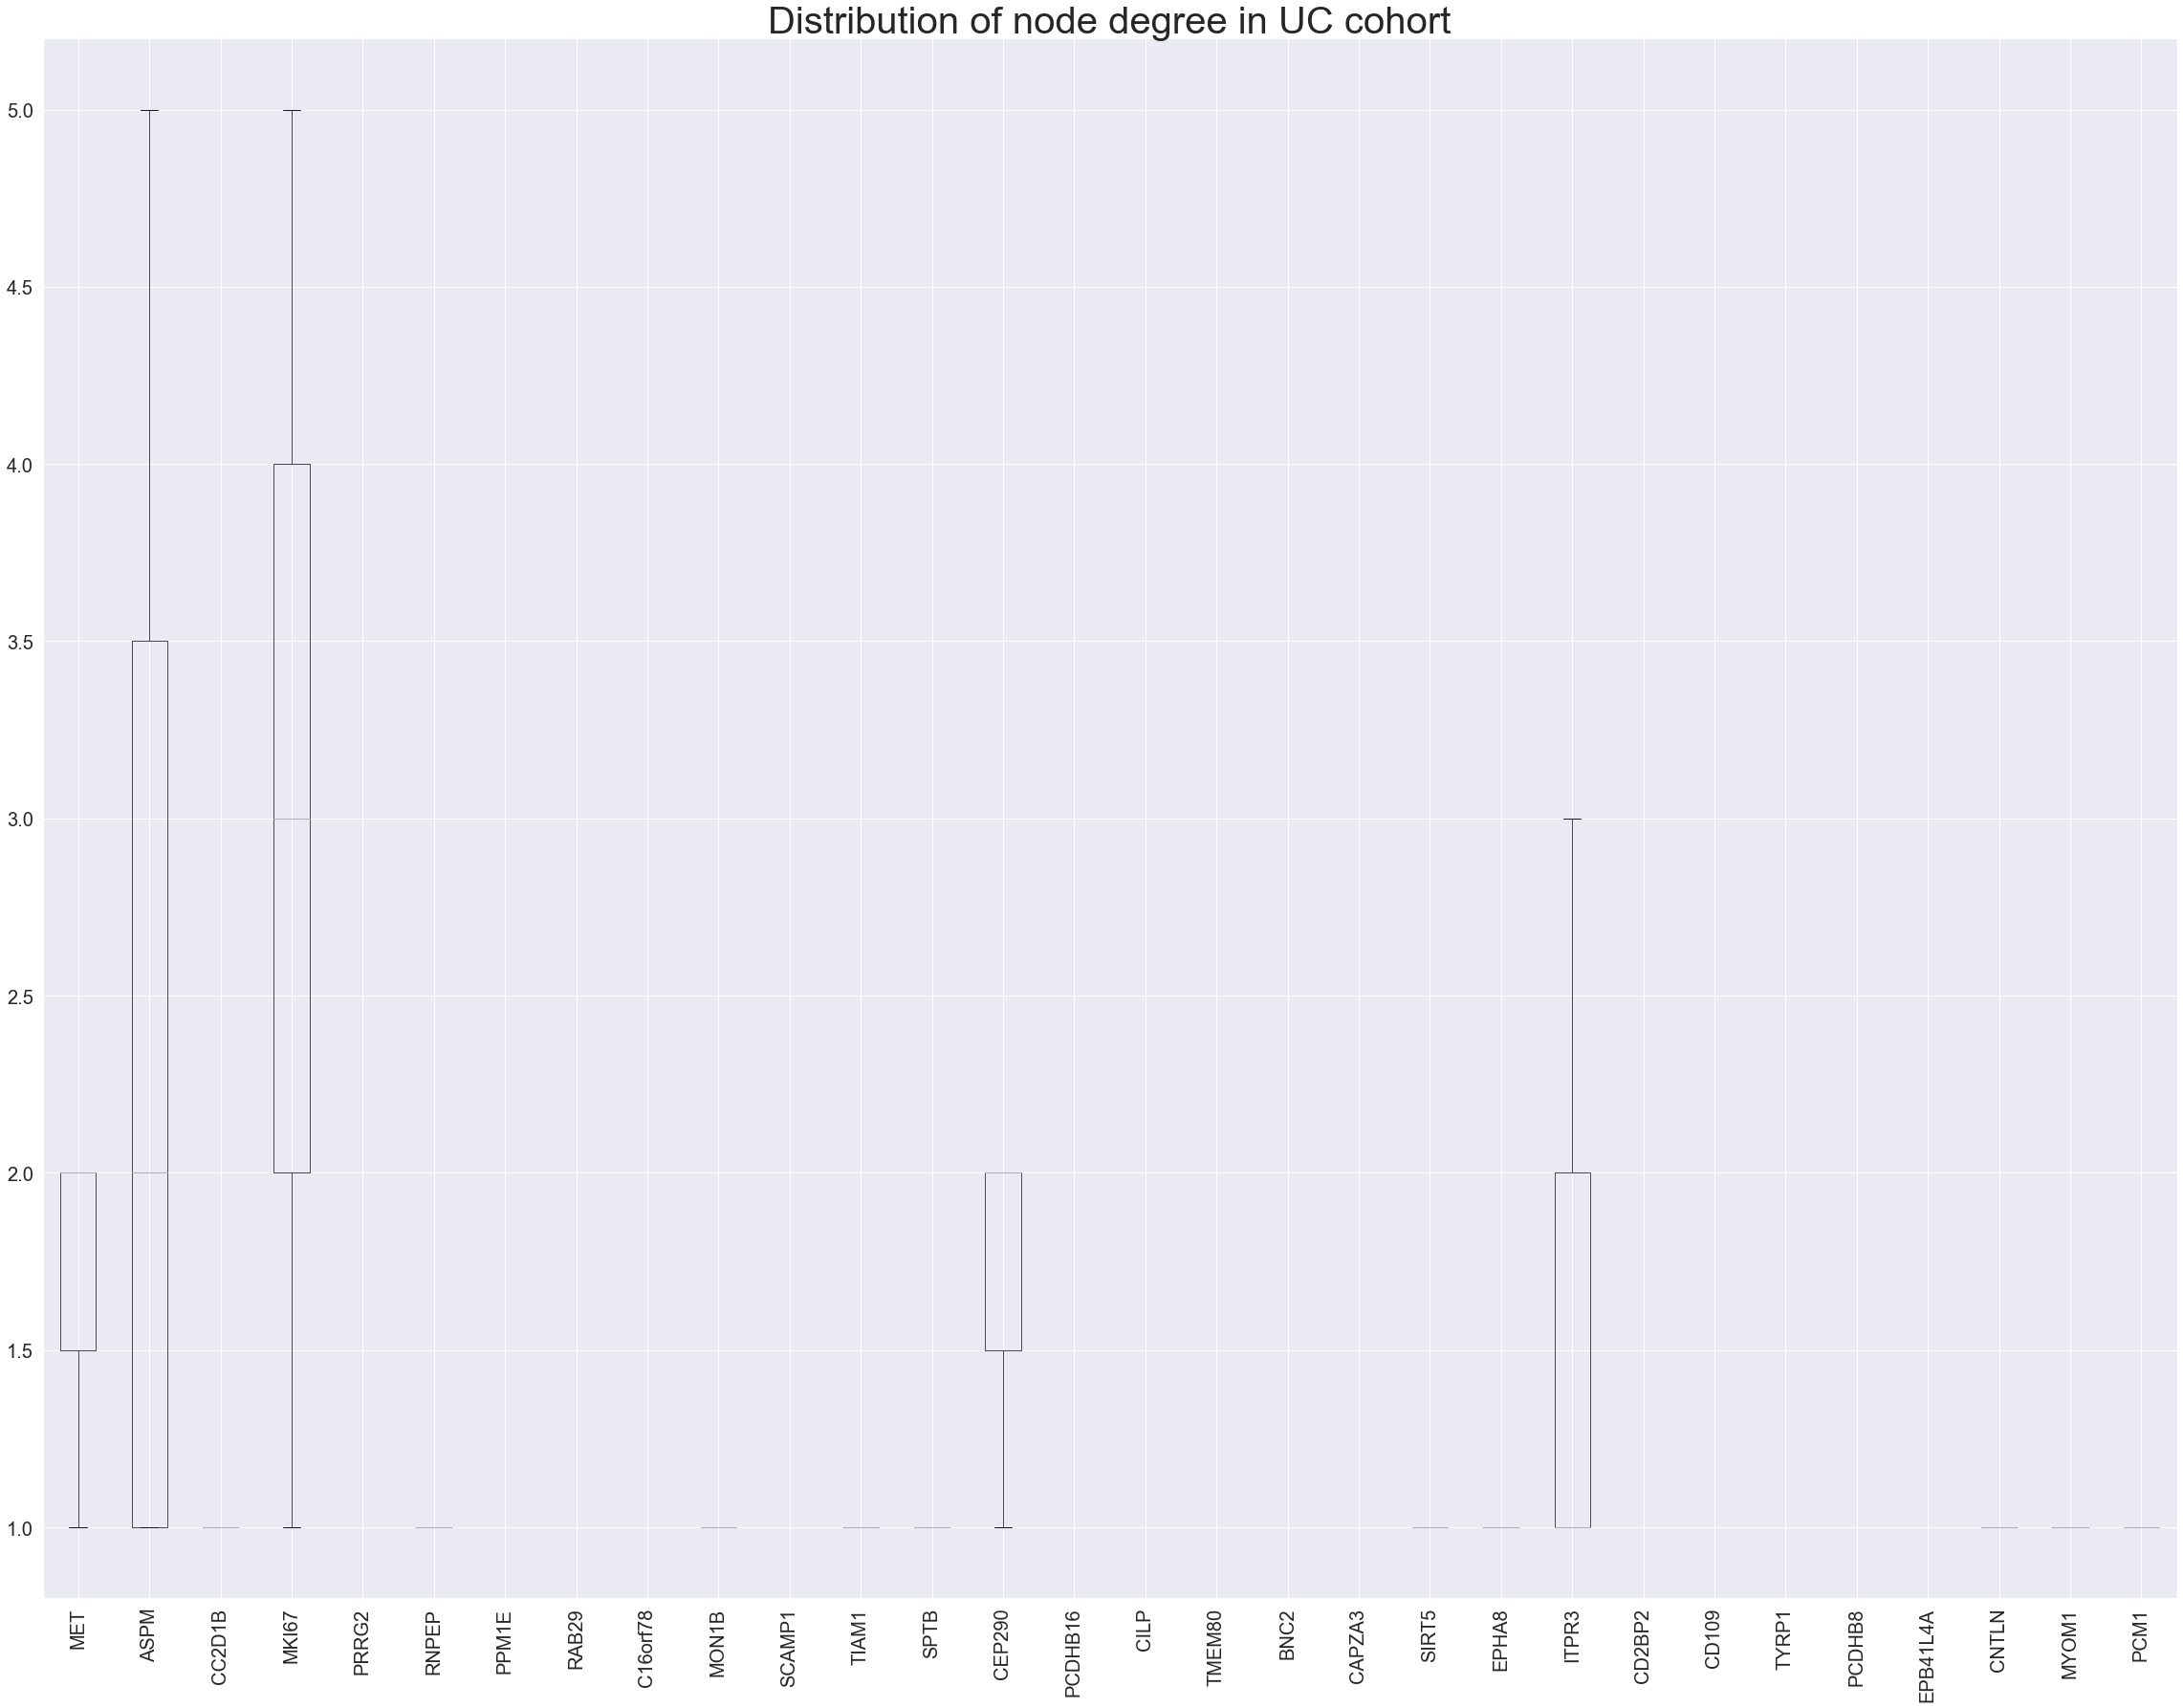

In [20]:
# 95th percentile
create_boxplot(CD_95_ND[CD_95_ND>0], top_CD_bin_95, name='CD cohort',save=True)
create_boxplot(UC_95_ND[UC_95_ND>0], top_UC_bin_95, name='UC cohort',save=True)


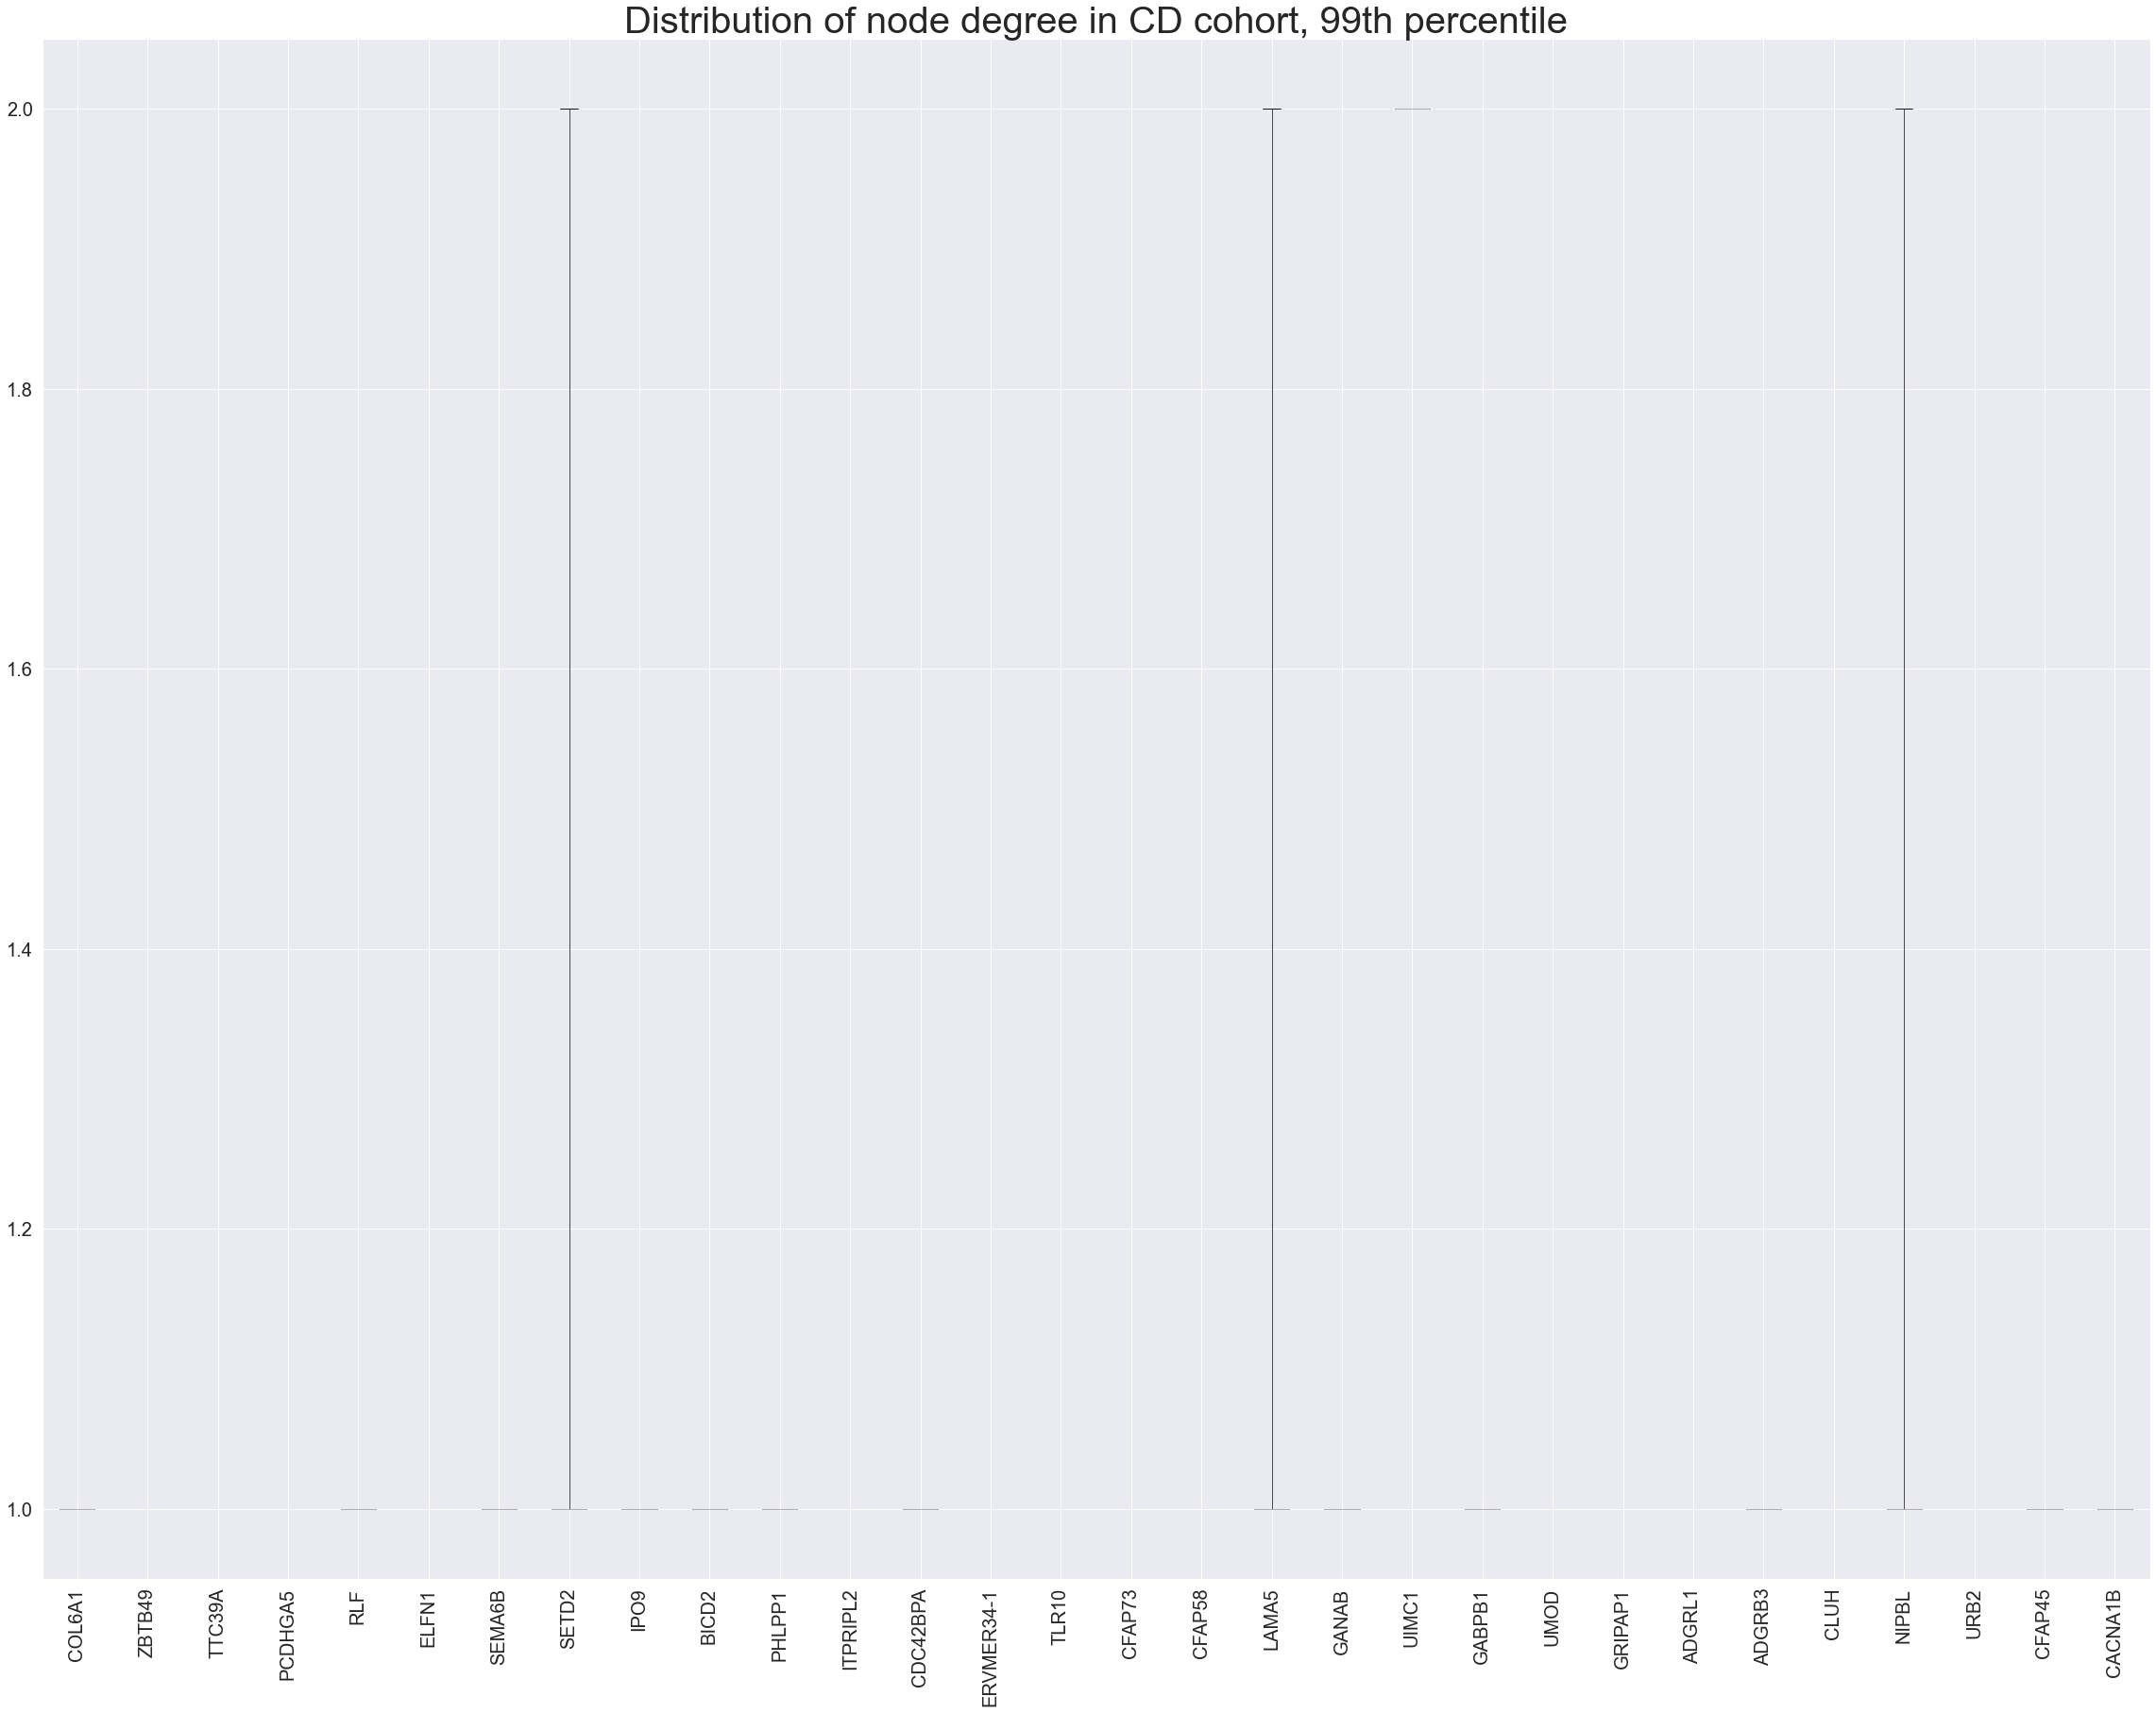

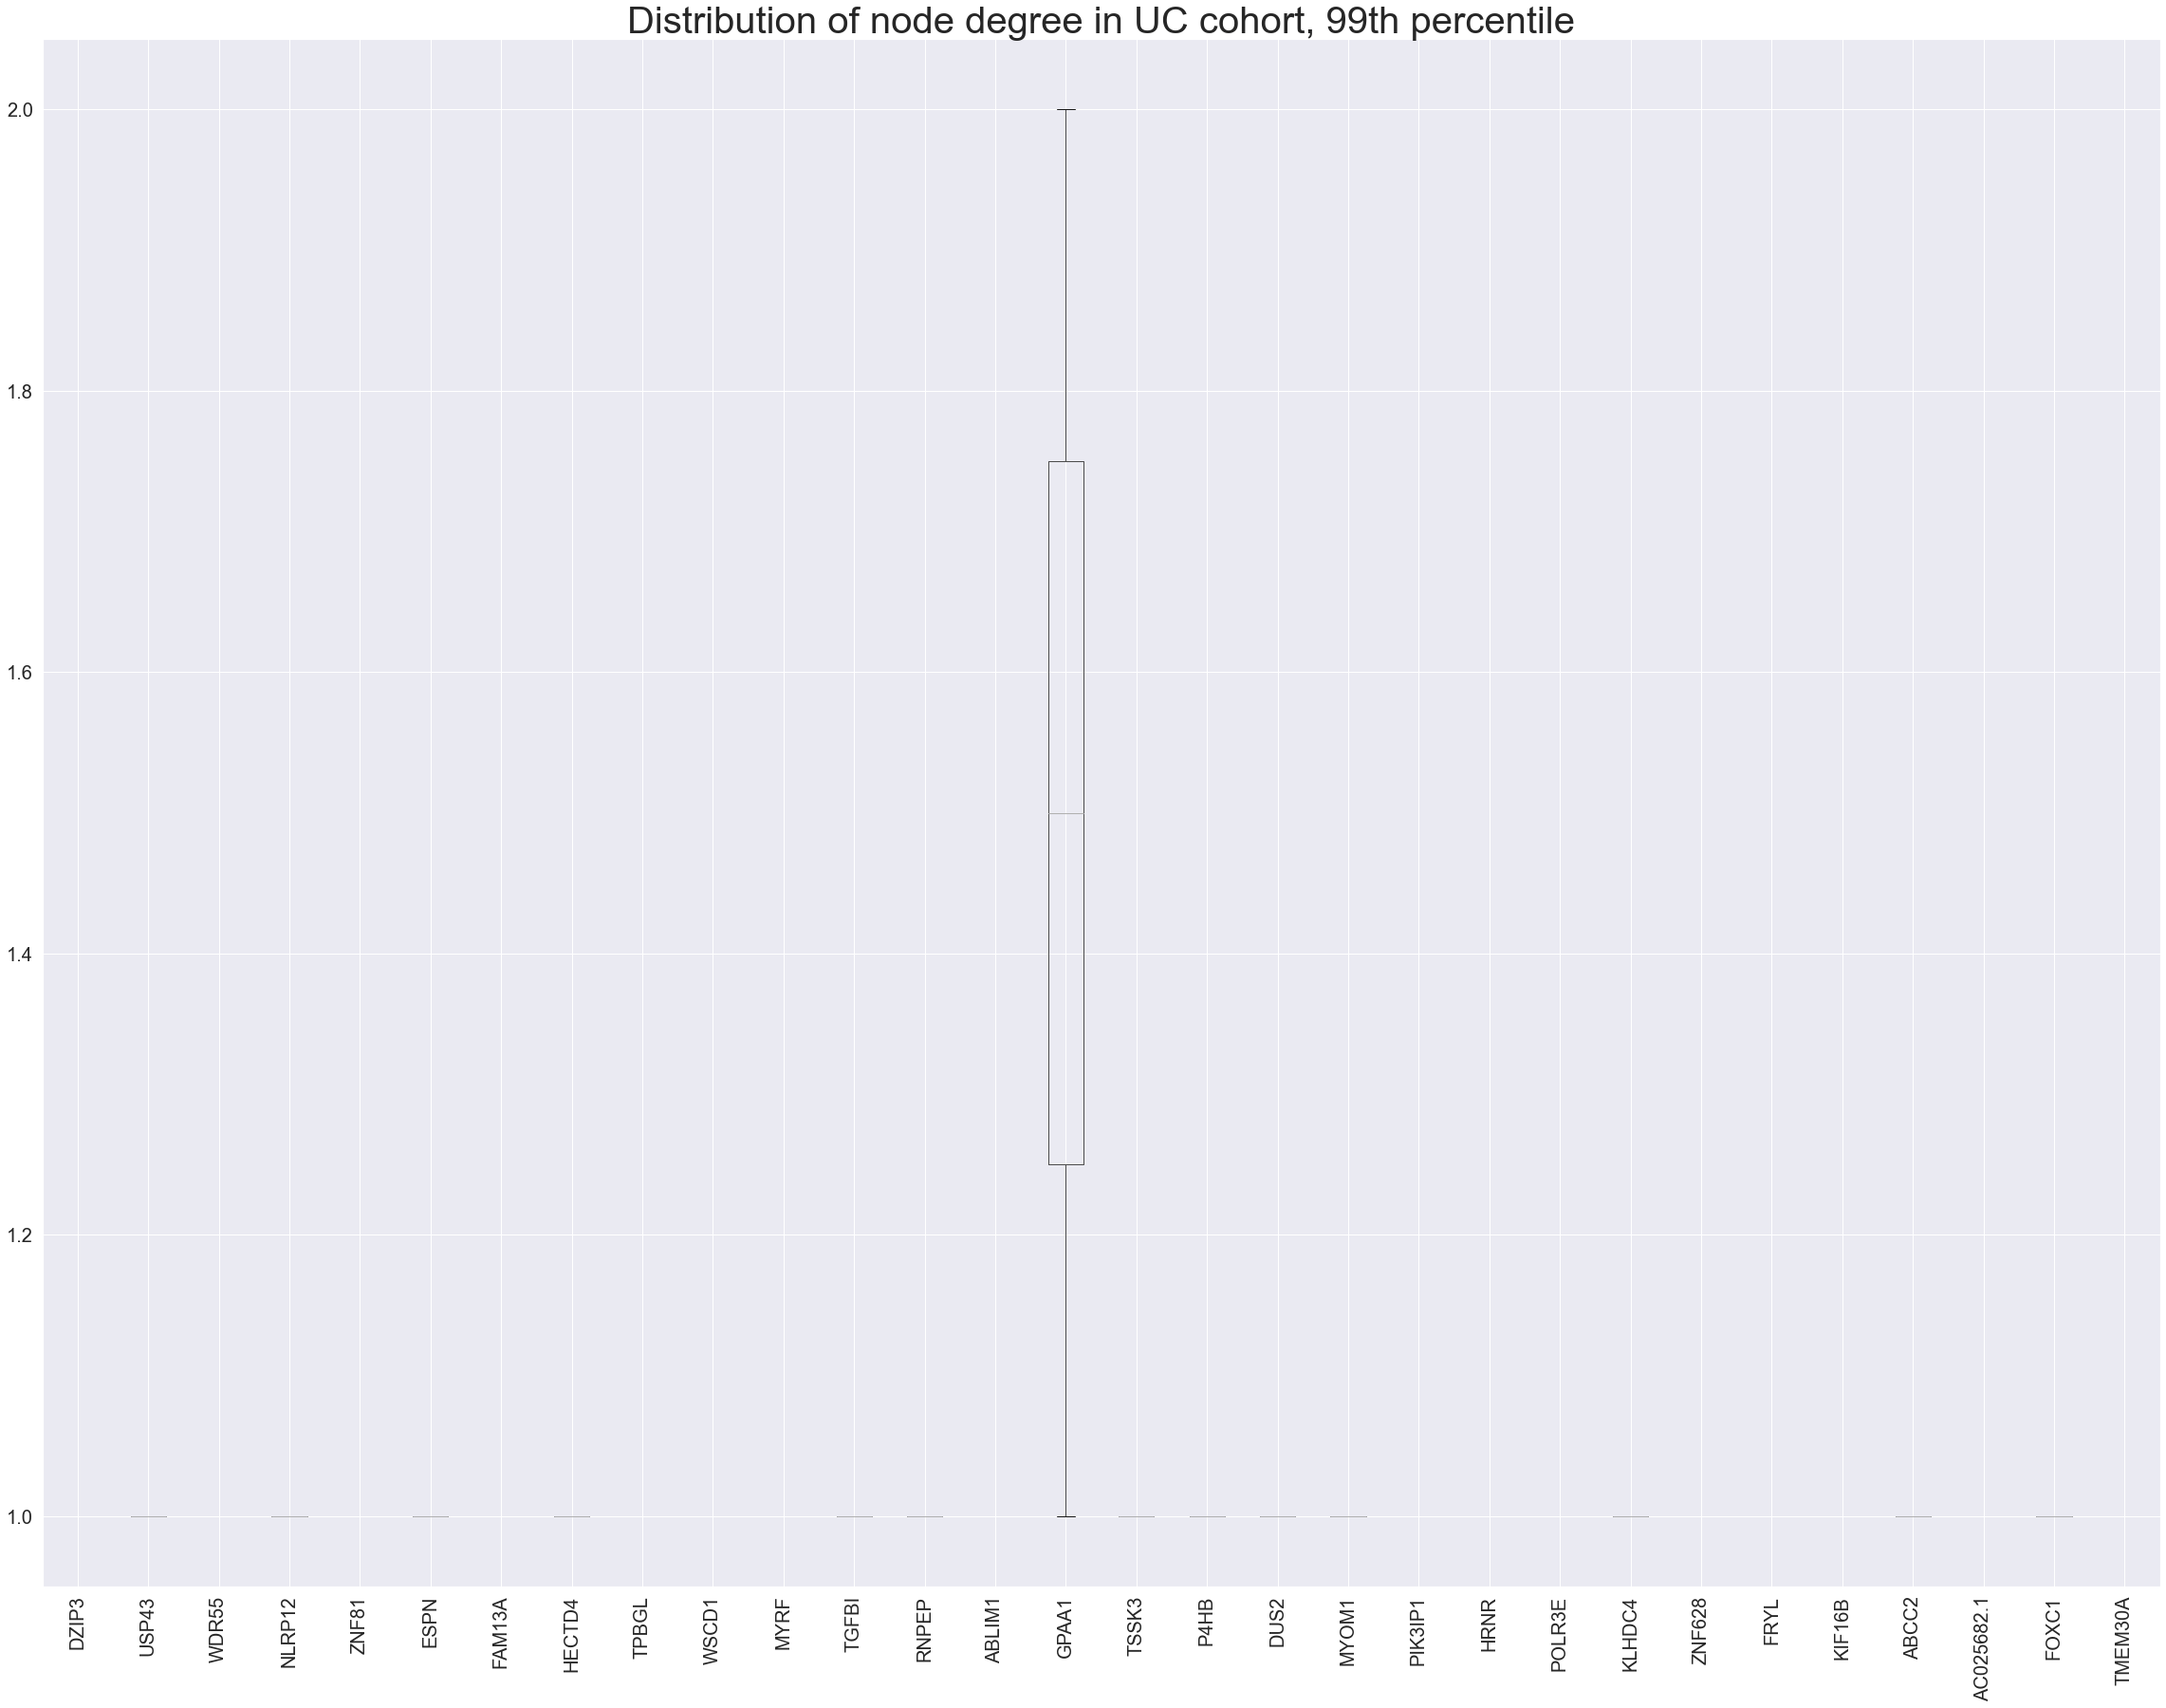

In [46]:
# 99th percentile
create_boxplot(CD_99_ND[CD_99_ND>0], top_CD_bin_99, name='CD cohort, 99th percentile',save=True)
create_boxplot(UC_99_ND[UC_99_ND>0], top_UC_bin_99, name='UC cohort, 99th percentile',save=True)

### total node degree 

In [ ]:
CD_95_MG.number_of_nodes()

In [56]:

def create_degree_barplot(multigraph, dataset):
    from get_network_analysis import get_total_degree_from_multigraph
    MG_95_ND_top = get_total_degree_from_multigraph(multigraph).head(30)
    bin_95_sum_topND = dataset.sum()[MG_95_ND_top.index]
    
    df = pd.concat([MG_95_ND_top, bin_95_sum_topND], axis=1)
    df.columns = ["Total Node degree", "No. of Patients"]
    
    sns.set(rc = {'figure.figsize':(40,30)})
    #title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.')
    ax = df.plot.bar(fontsize=30, color=['darkgrey','gray'])
    ax.legend(prop={'size': 60})
    ax.set_title('Total node degree and no. of patients in 99th percentile for CD cohort', size=30)
    ax.figure.savefig('TopCD_ND_Bar_99.png')

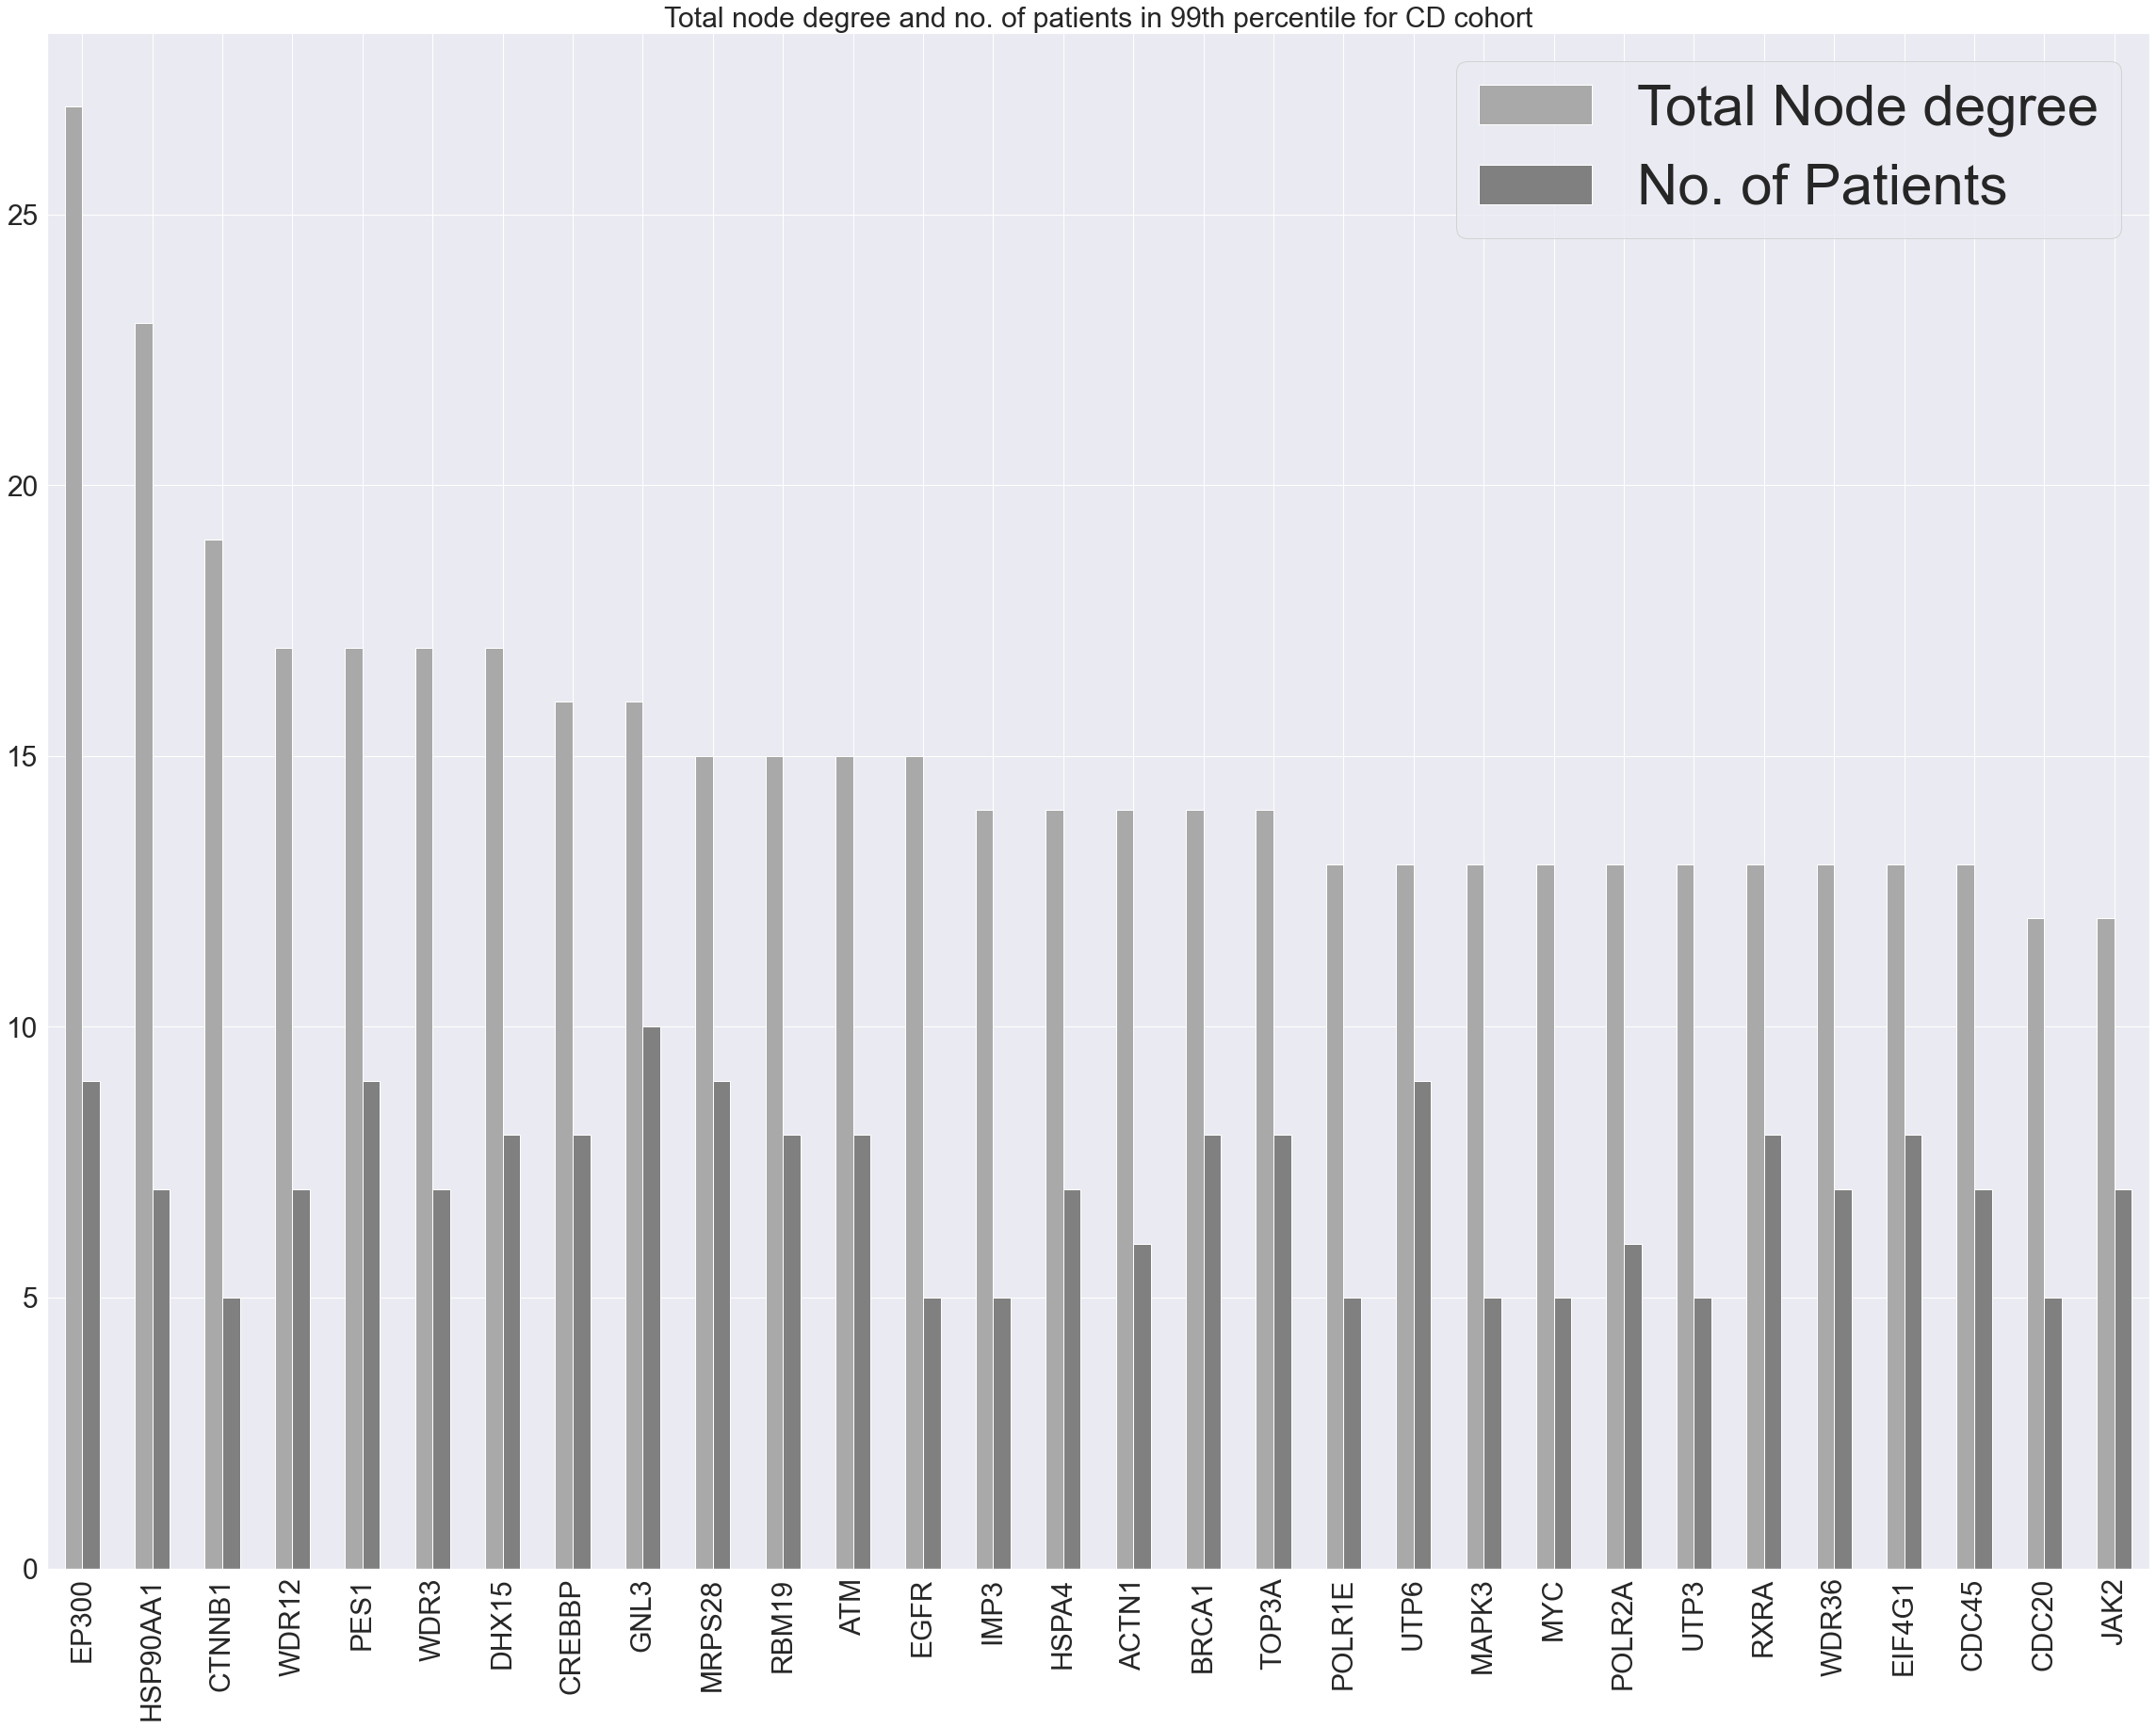

In [57]:
create_degree_barplot(CD_99_MG, CD_bin_99)

In [6]:
## for highest pations 
def create_degree_barplot_patients(multigraph, dataset):
    from get_network_analysis import get_total_degree_from_multigraph
    bin_95_sum_topND = dataset.sum().sort_values(ascending=False).head(30)
    MG_95_ND_top = get_total_degree_from_multigraph(multigraph)[bin_95_sum_topND.index]
    
    
    df = pd.concat([MG_95_ND_top, bin_95_sum_topND], axis=1)
    df.columns = ["Total Node degree", "No. of Patients"]
    
    sns.set(rc = {'figure.figsize':(40,30)})
    #title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.')
    ax = df.plot.bar(fontsize=30, color=['darkgrey','gray'])
    ax.legend(prop={'size': 60})
    ax.set_title('Total node degree and no. of patients in 99th percentile for CD cohort', size=30)
    # ax.figure.savefig('TopCD_ND_Bar_99.png')

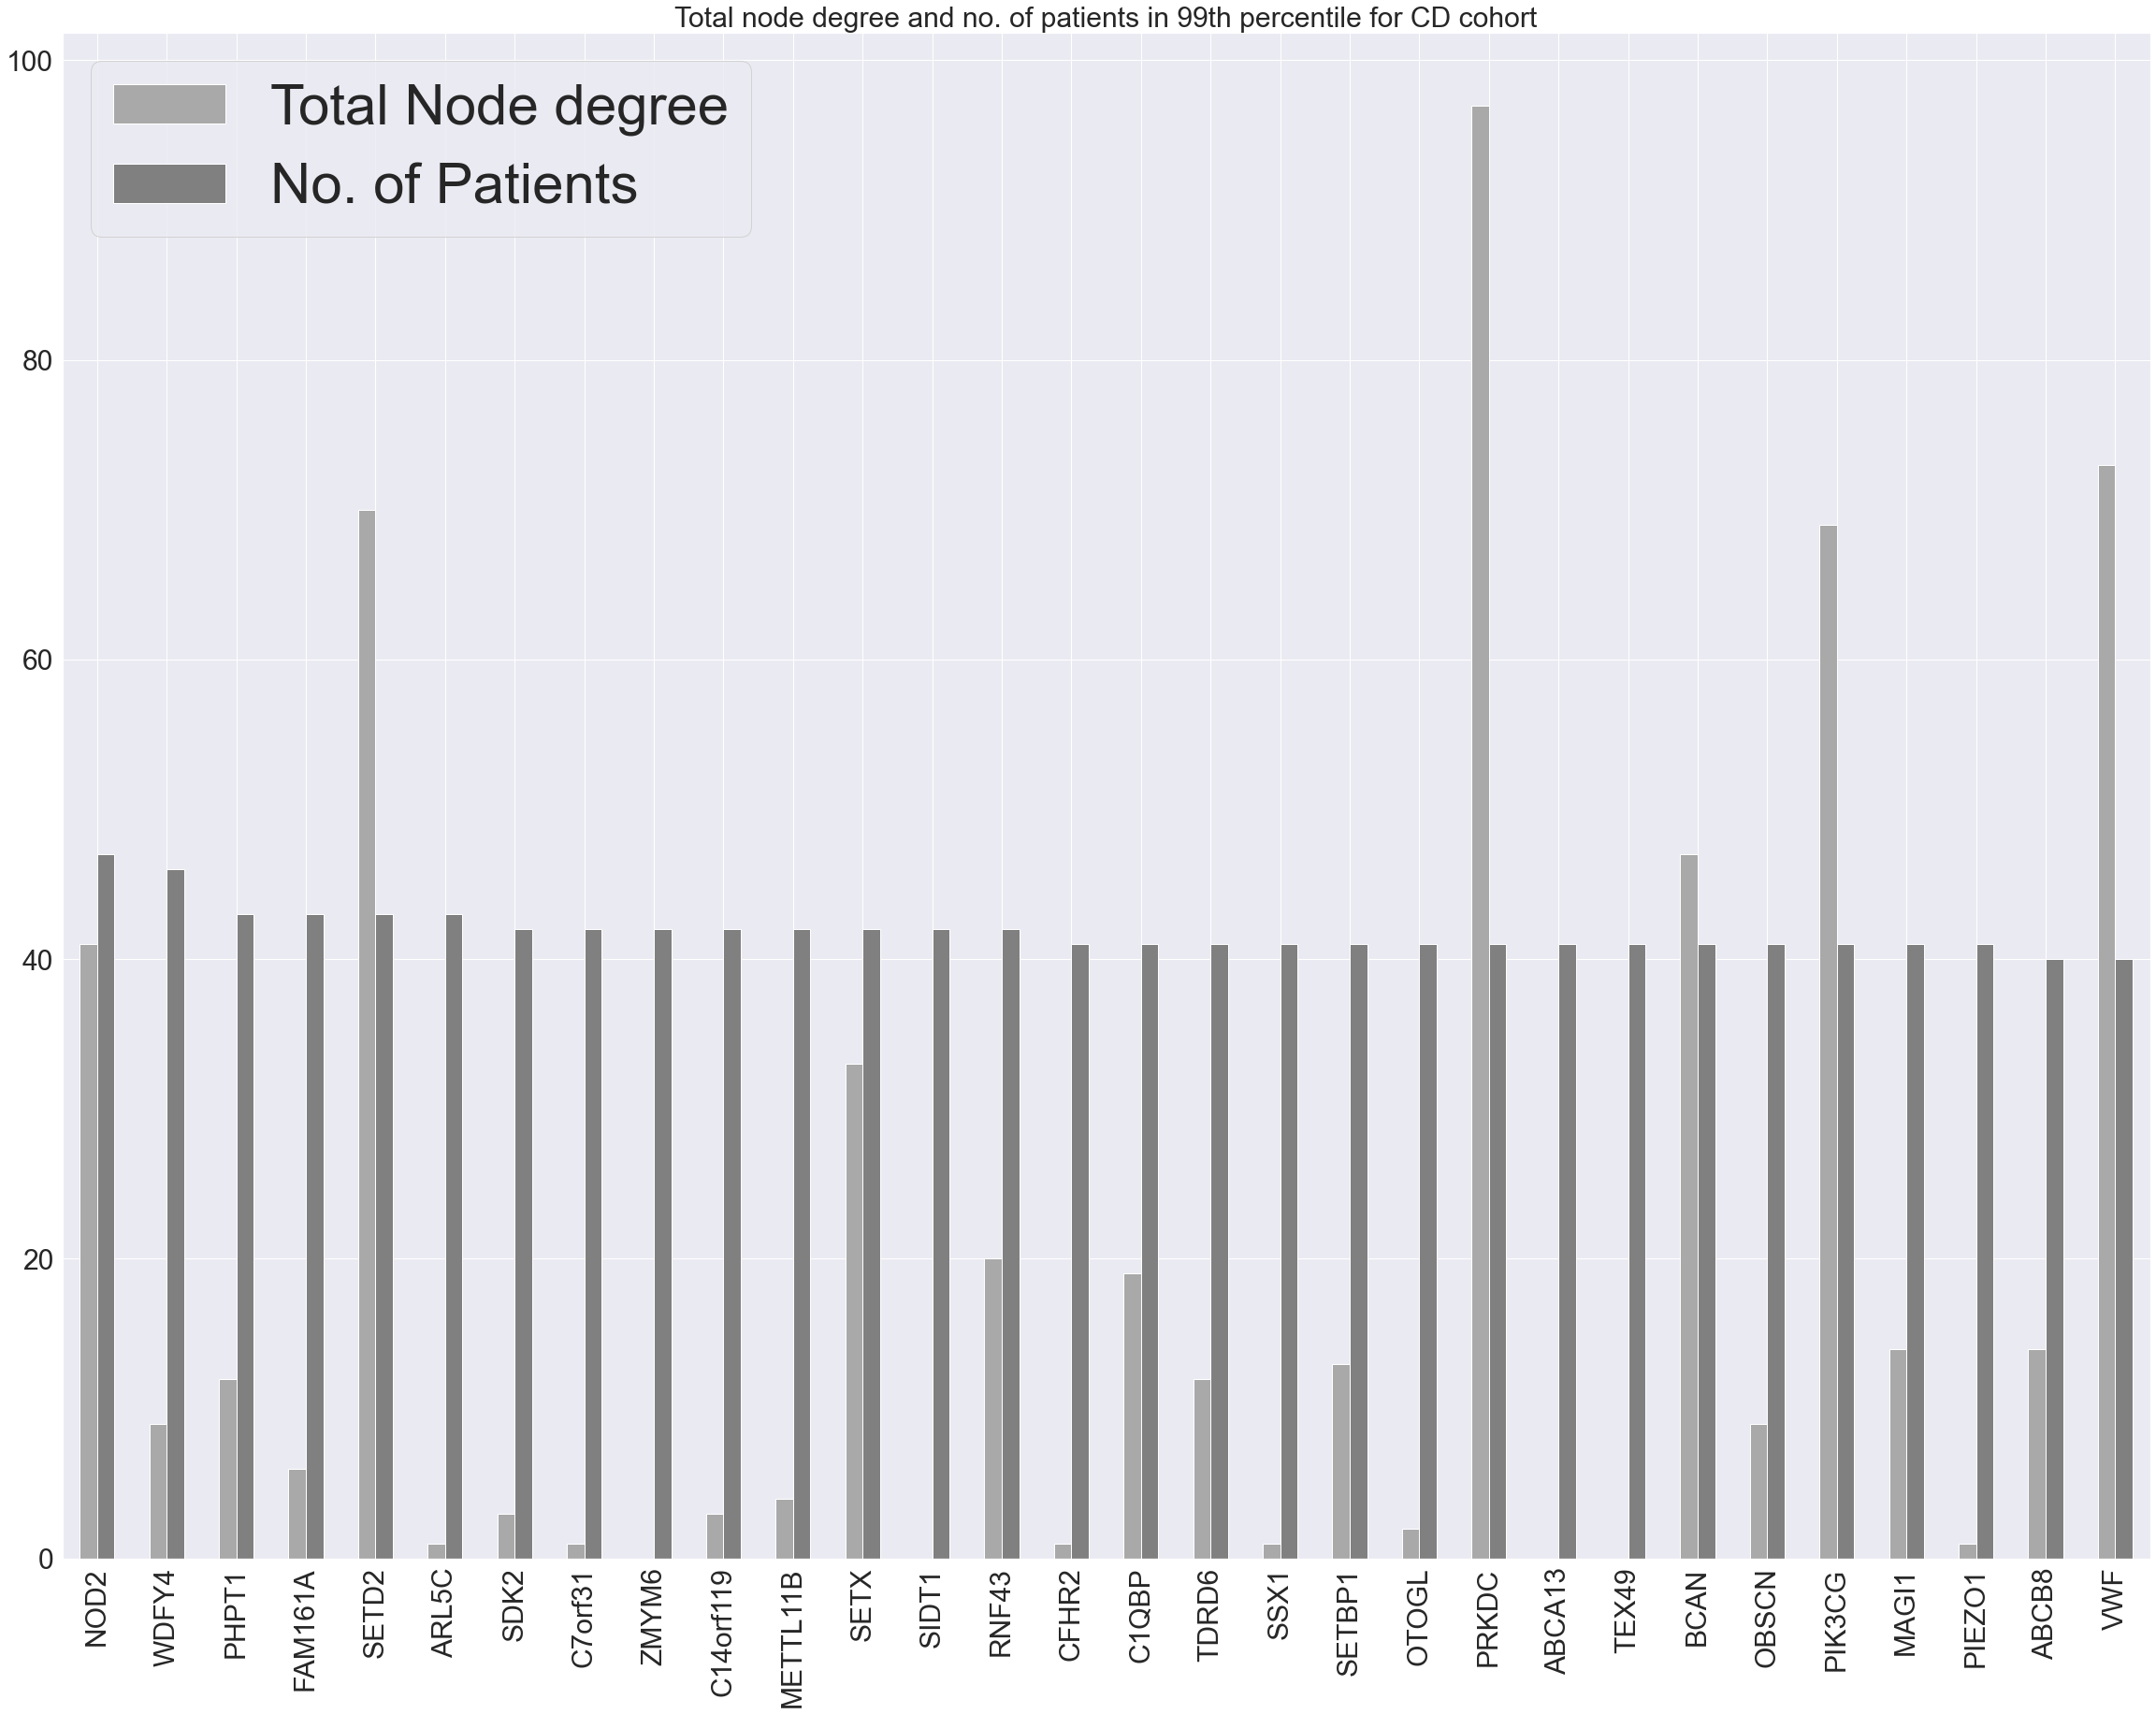

In [7]:
create_degree_barplot_patients(CD_95_MG, CD_bin_95)

In [59]:
genepy_df.columns

Index(['A1BG_ENSG00000121410', 'A1CF_ENSG00000148584', 'A2ML1_ENSG00000166535',
       'A2M_ENSG00000175899', 'A3GALT2_ENSG00000184389',
       'A4GALT_ENSG00000128274', 'A4GNT_ENSG00000118017',
       'AAAS_ENSG00000094914', 'AACS_ENSG00000081760',
       'AADACL3_ENSG00000188984',
       ...
       'ZUP1_ENSG00000153975', 'ZW10_ENSG00000086827',
       'ZWILCH_ENSG00000174442', 'ZWINT_ENSG00000122952',
       'ZXDC_ENSG00000070476', 'ZYG11A_ENSG00000203995',
       'ZYG11B_ENSG00000162378', 'ZYX_ENSG00000159840',
       'ZZEF1_ENSG00000074755', 'ZZZ3_ENSG00000036549'],
      dtype='object', length=16472)

### Add Betweeness centrality to bar chart 

In [21]:
def betweeness_centrality(graph_list):
    df_betweeness_central = pd.DataFrame(dtype='float64')
    for graph in graph_list:
        BC_Series = pd.Series(nx.betweenness_centrality(graph),
                           name=graph.name)
        df_betweeness_central = pd.concat([df_betweeness_central, BC_Series],
                                          axis=1)
    df_betweeness_central = df_betweeness_central.fillna(0).T
    return df_betweeness_central

In [22]:
CD_95_BC = betweeness_centrality(CD_95_GL)

KeyboardInterrupt: 

In [ ]:
CD_95_BC.sum().sort_values(ascending=False)

## Big graph

In [68]:
G2 = nx.Graph(CD_95_MG)
G2.number_of_edges()

29352

### Patient total + Degree + BC + CC

In [74]:
# Patient
from get_network_analysis import get_total_degree_from_multigraph

# Patients
bin_95_sum_topND = CD_bin_95.sum().sort_values(ascending=False).head(30)
# Degree
MG_95_ND_top = get_total_degree_from_multigraph(CD_95_MG)[bin_95_sum_topND.index]
# BC

# CC



In [90]:
# Total Degree
MG_95_ND_top = get_total_degree_from_multigraph(CD_95_MG)[bin_95_sum_topND.index]
MG_95_ND_top

NOD2         41
WDFY4         9
PHPT1        12
FAM161A       6
SETD2        70
ARL5C         1
SDK2          3
C7orf31       1
ZMYM6         0
C14orf119     3
METTL11B      4
SETX         33
SIDT1         0
RNF43        20
CFHR2         1
C1QBP        19
TDRD6        12
SSX1          1
SETBP1       13
OTOGL         2
PRKDC        97
ABCA13        0
TEX49         0
BCAN         47
OBSCN         9
PIK3CG       69
MAGI1        14
PIEZO1        1
ABCB8        14
VWF          73
dtype: int64

In [81]:
CD_95_BC = nx.betweenness_centrality(G2)

In [83]:
CD_95_BC_Series = pd.Series(CD_95_BC)

In [84]:
CD_95_BC_Series[bin_95_sum_topND.index]

NOD2         0.001389
WDFY4        0.000273
PHPT1        0.000068
FAM161A      0.000010
SETD2        0.001120
ARL5C        0.000000
SDK2         0.000000
C7orf31      0.000000
ZMYM6        0.000000
C14orf119    0.000004
METTL11B     0.000002
SETX         0.001121
SIDT1        0.000000
RNF43        0.000254
CFHR2        0.000000
C1QBP        0.000670
TDRD6        0.000062
SSX1         0.000000
SETBP1       0.000195
OTOGL        0.000012
PRKDC        0.002503
ABCA13       0.000000
TEX49        0.000000
BCAN         0.000605
OBSCN        0.000030
PIK3CG       0.000998
MAGI1        0.000258
PIEZO1       0.000000
ABCB8        0.000091
VWF          0.001617
dtype: float64

In [91]:
CD_95_CC = pd.Series({i: nx.closeness_centrality(G2, u=i) for i in bin_95_sum_topND.index})
CD_95_CC.values

array([1.29585799e-01, 1.01133113e-01, 1.00033010e-01, 9.64219500e-02,
       1.30679398e-01, 6.35889610e-05, 6.88804016e-02, 6.35889610e-05,
       0.00000000e+00, 8.82975132e-02, 9.56381482e-02, 1.31112866e-01,
       0.00000000e+00, 1.04951368e-01, 9.53669204e-02, 1.20551299e-01,
       1.03066949e-01, 7.11558575e-02, 1.13135830e-01, 8.43031373e-02,
       1.40062383e-01, 0.00000000e+00, 0.00000000e+00, 1.22584591e-01,
       1.15918169e-01, 1.37301167e-01, 1.12629649e-01, 6.35889610e-05,
       1.05948296e-01, 1.35293550e-01])

In [ ]:
def create_bar_plot_multi(dataset, multigraph, head=30):
    # patients
    bin_95_sum_topND = dataset.sum().sort_values(ascending=False).head(head)
  
    # Degree
    MG_95_ND_top = get_total_degree_from_multigraph(multigraph)[bin_95_sum_topND.index]
    
    # BC
    G2 = nx.Graph(multigraph)
    CD_95_BC = nx.betweenness_centrality(G2)
    CD_95_BC = pd.Series(CD_95_BC)[bin_95_sum_topND.index]

    # CC
    CD_95_CC = pd.Series({i: nx.closeness_centrality(G2, u=i) for i in bin_95_sum_topND.index})
    
    x = bin_95_sum_topND.index
    y1 = bin_95_sum_topND.values
    y2 = MG_95_ND_top.values
    y3 = CD_95_BC.values
    y4 = CD_95_CC.values
    
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(kind="bar", x, y1)
    ax1.plot(kind="bar", x, y2)
    
    ax2.plot(kind="bar", x, y3)
    ax2.plot(kind="bar", x, y4)
    
    ax1.set_xlabel('X data')
    ax1.set_ylabel('Degree and Patients', color='g')
    ax2.set_ylabel('BC and CC', color='b')
    plt.legend
    plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'builtin_function_or_method'

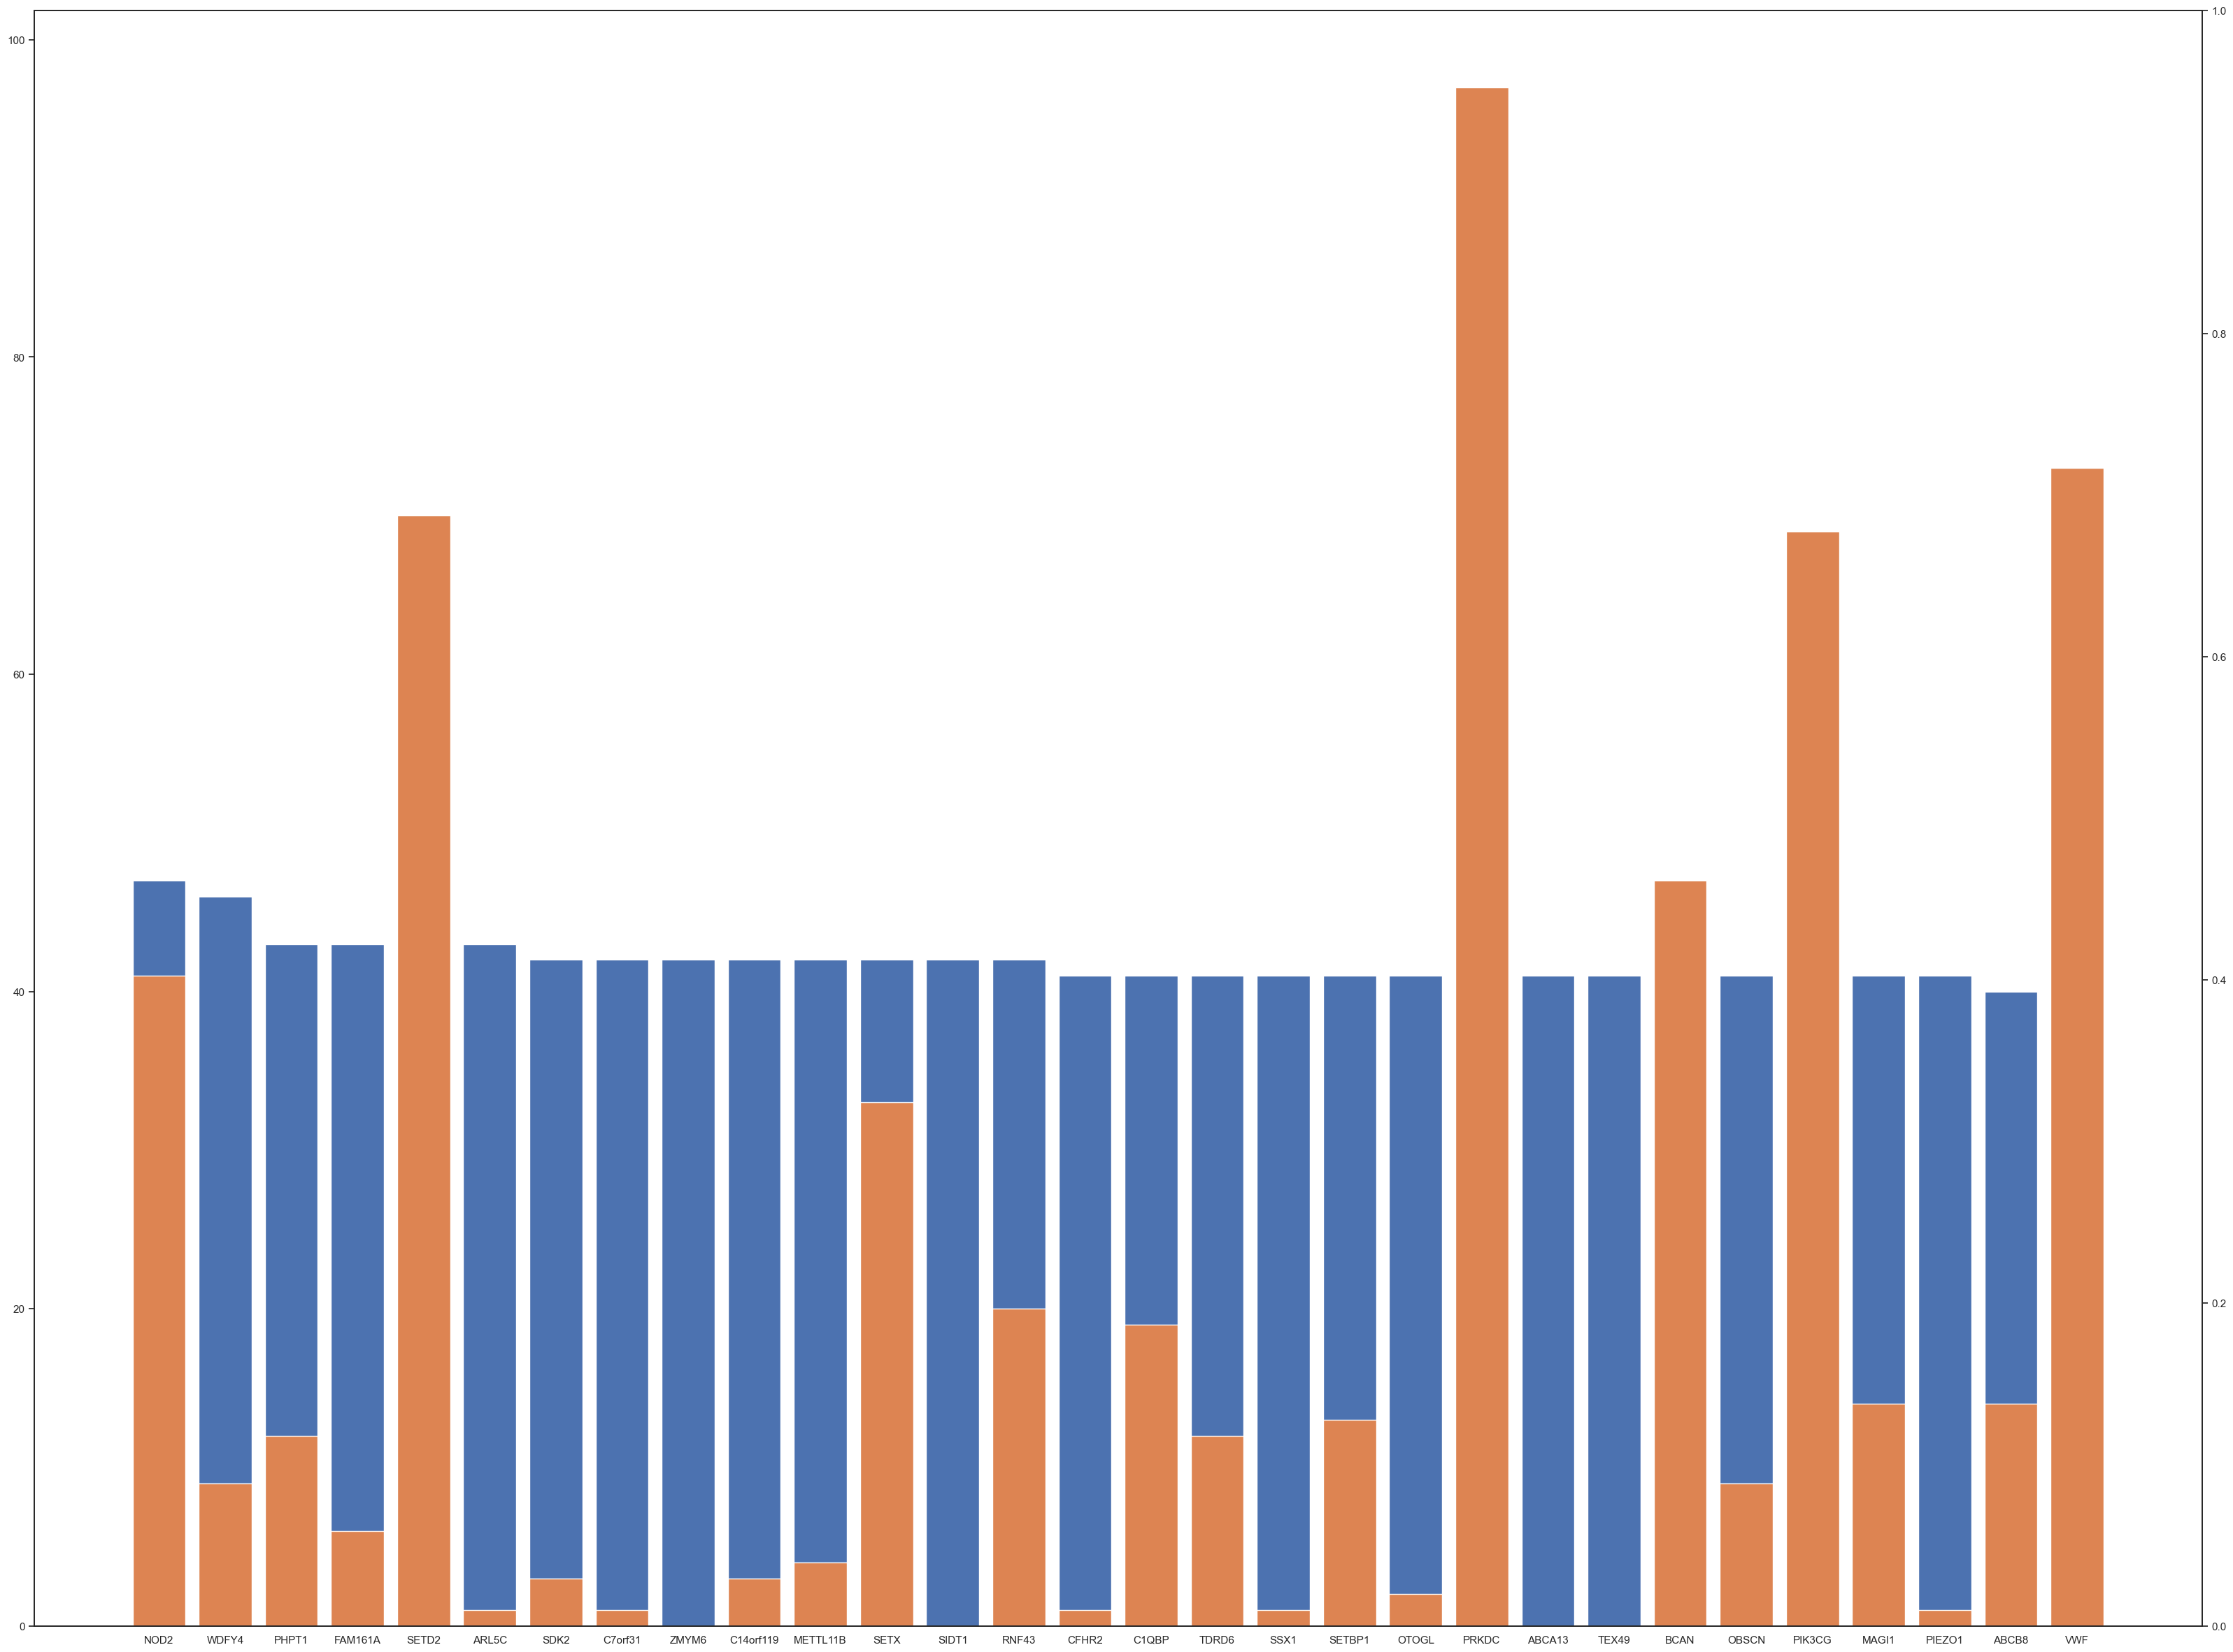

In [95]:
x = bin_95_sum_topND.index
y1 = bin_95_sum_topND.values
y2 = MG_95_ND_top.values
y3 = CD_95_BC.values
y4 = CD_95_CC.values

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1)
ax1.bar(x, y2)
    
ax2.bar(x, y3)
ax2.bar(x, y4)
    
ax1.set_xlabel('X data')
ax1.set_ylabel('Degree and Patients', color='g')
ax2.set_ylabel('BC and CC', color='b')
plt.legend
plt.show()

In [105]:
CD_95_BC = pd.Series(CD_95_BC)[bin_95_sum_topND.index]
CD_95_CC

NOD2         0.129586
WDFY4        0.101133
PHPT1        0.100033
FAM161A      0.096422
SETD2        0.130679
ARL5C        0.000064
SDK2         0.068880
C7orf31      0.000064
ZMYM6        0.000000
C14orf119    0.088298
METTL11B     0.095638
SETX         0.131113
SIDT1        0.000000
RNF43        0.104951
CFHR2        0.095367
C1QBP        0.120551
TDRD6        0.103067
SSX1         0.071156
SETBP1       0.113136
OTOGL        0.084303
PRKDC        0.140062
ABCA13       0.000000
TEX49        0.000000
BCAN         0.122585
OBSCN        0.115918
PIK3CG       0.137301
MAGI1        0.112630
PIEZO1       0.000064
ABCB8        0.105948
VWF          0.135294
dtype: float64

In [110]:
df = pd.concat([bin_95_sum_topND, MG_95_ND_top, CD_95_BC, CD_95_CC], axis=1)
df.columns = ['Patients', 'Degree','BC','CC']
df

,Patients,Degree,BC,CC
NOD2,47,41,0.001389,0.129586
WDFY4,46,9,0.000273,0.101133
PHPT1,43,12,0.000068,0.100033
FAM161A,43,6,0.000010,0.096422
SETD2,43,70,0.001120,0.130679
ARL5C,43,1,0.000000,0.000064
SDK2,42,3,0.000000,0.068880
C7orf31,42,1,0.000000,0.000064
ZMYM6,42,0,0.000000,0.000000
C14orf119,42,3,0.000004,0.088298


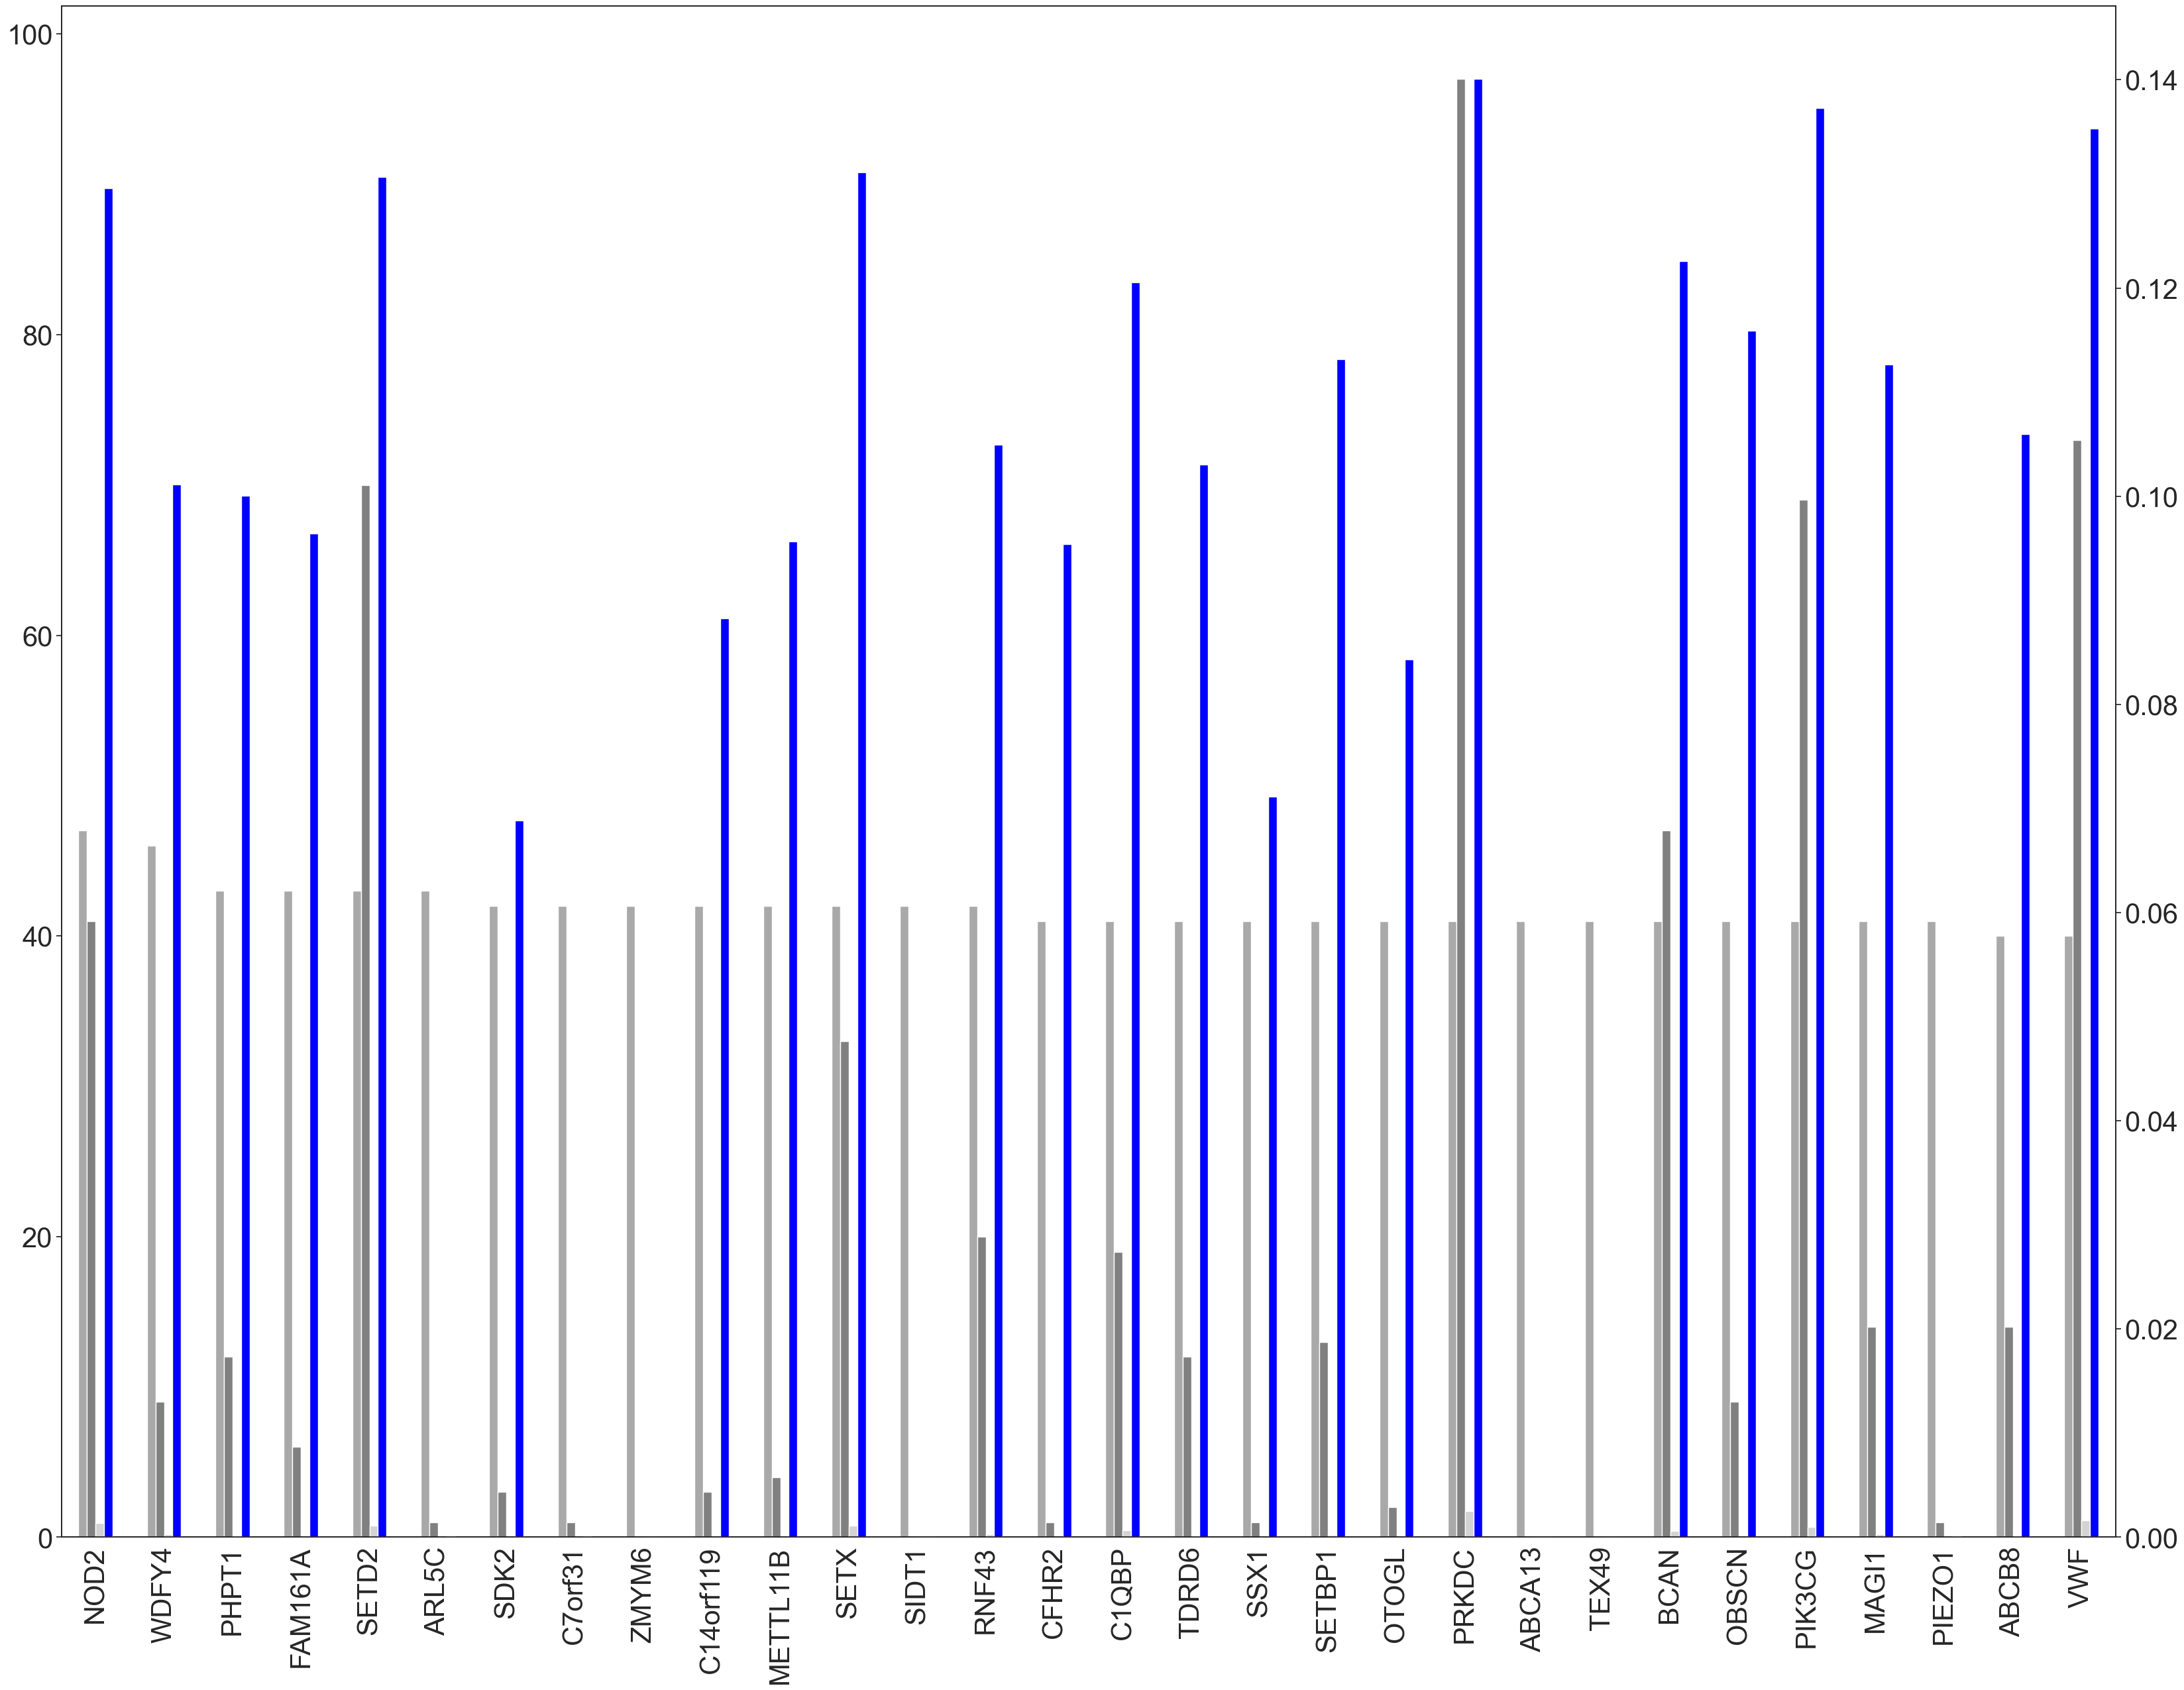

In [113]:

fig, ax = plt.subplots()
ax = df.plot(ax=ax, 
             kind='bar',
             fontsize=30, 
             color=['darkgrey','gray','lightgrey','blue'],
             secondary_y=['BC','CC'],
             legend=False)


In [21]:
def betweeness_centrality(graph_list):
    df_betweeness_central = pd.DataFrame(dtype='float64')
    for graph in graph_list:
        BC_Series = pd.Series(nx.betweenness_centrality(graph),
                           name=graph.name)
        df_betweeness_central = pd.concat([df_betweeness_central, BC_Series],
                                          axis=1)
    df_betweeness_central = df_betweeness_central.fillna(0).T
    return df_betweeness_central

In [78]:
bin_95_sum_topND

NOD2         47
WDFY4        46
PHPT1        43
FAM161A      43
SETD2        43
ARL5C        43
SDK2         42
C7orf31      42
ZMYM6        42
C14orf119    42
METTL11B     42
SETX         42
SIDT1        42
RNF43        42
CFHR2        41
C1QBP        41
TDRD6        41
SSX1         41
SETBP1       41
OTOGL        41
PRKDC        41
ABCA13       41
TEX49        41
BCAN         41
OBSCN        41
PIK3CG       41
MAGI1        41
PIEZO1       41
ABCB8        40
VWF          40
dtype: int64

### Test 1

### Working Test2
Need to add the following:
- Y axis labels
- Legend 
- Closeness Centrality


In [61]:
## for highest pations 
import matplotlib.patches as mpatches
import matplotlib as mpl
def create_degree_barplot_patients(multigraph, dataset, graph_list):
    from get_network_analysis import get_total_degree_from_multigraph
    bin_95_sum_topND = dataset.sum().sort_values(ascending=False).head(30)
    MG_95_ND_top = get_total_degree_from_multigraph(multigraph)[bin_95_sum_topND.index]
    for i in bin_95_sum_topND
    GL_95_BC = betweeness_centrality(CD_95_GL)[bin_95_sum_topND.index].sum().T
    
    df = pd.concat([MG_95_ND_top, bin_95_sum_topND, GL_95_BC], axis=1)
    df.columns = ["Node_degree", "Patients", "Betweeness_Centrality"]
    
    fig, ax = plt.subplots()
    # sns.set(rc = {'figure.figsize':(40,30)})
    sns.set_style("white")
    sns.despine()
    #title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.')
    
    ax = df.plot(ax=ax, 
                 kind='bar',
                 fontsize=30, 
                 color=['darkgrey','gray','lightgrey'],
                 secondary_y='Betweeness_Centrality',
                 legend=False)
    
    
    ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes

    ax1.set_ylabel('Node degree and no of patients', size=40)

    ax2.set_ylabel('Betweeness Centrality', size=40)
    #lines = ax.get_lines() + ax.right_ax.get_lines()
    L = [mpatches.Patch(color=c, label=col) for col, c in zip(df.columns, plt.rcParams['axes.prop_cycle'].by_key()['color'])]
    
    
    leg = plt.legend(handles=L, prop={'size': 30})
    colours = ['darkgrey','gray','lightgrey']
    colour_index = 0
    for i in leg.legendHandles:
        
        i.set_color(colours[colour_index])
        colour_index += 1
    
    #a1.legend(prop={'size': 30})
    
    #lines, [l.get_label() for l in lines], prop={'size': 30}
    ax.set_title('Total node degree and no. of patients in 99th percentile for CD cohort', size=30)
    # ax.figure.savefig('TopCD_ND_Bar_99.png')

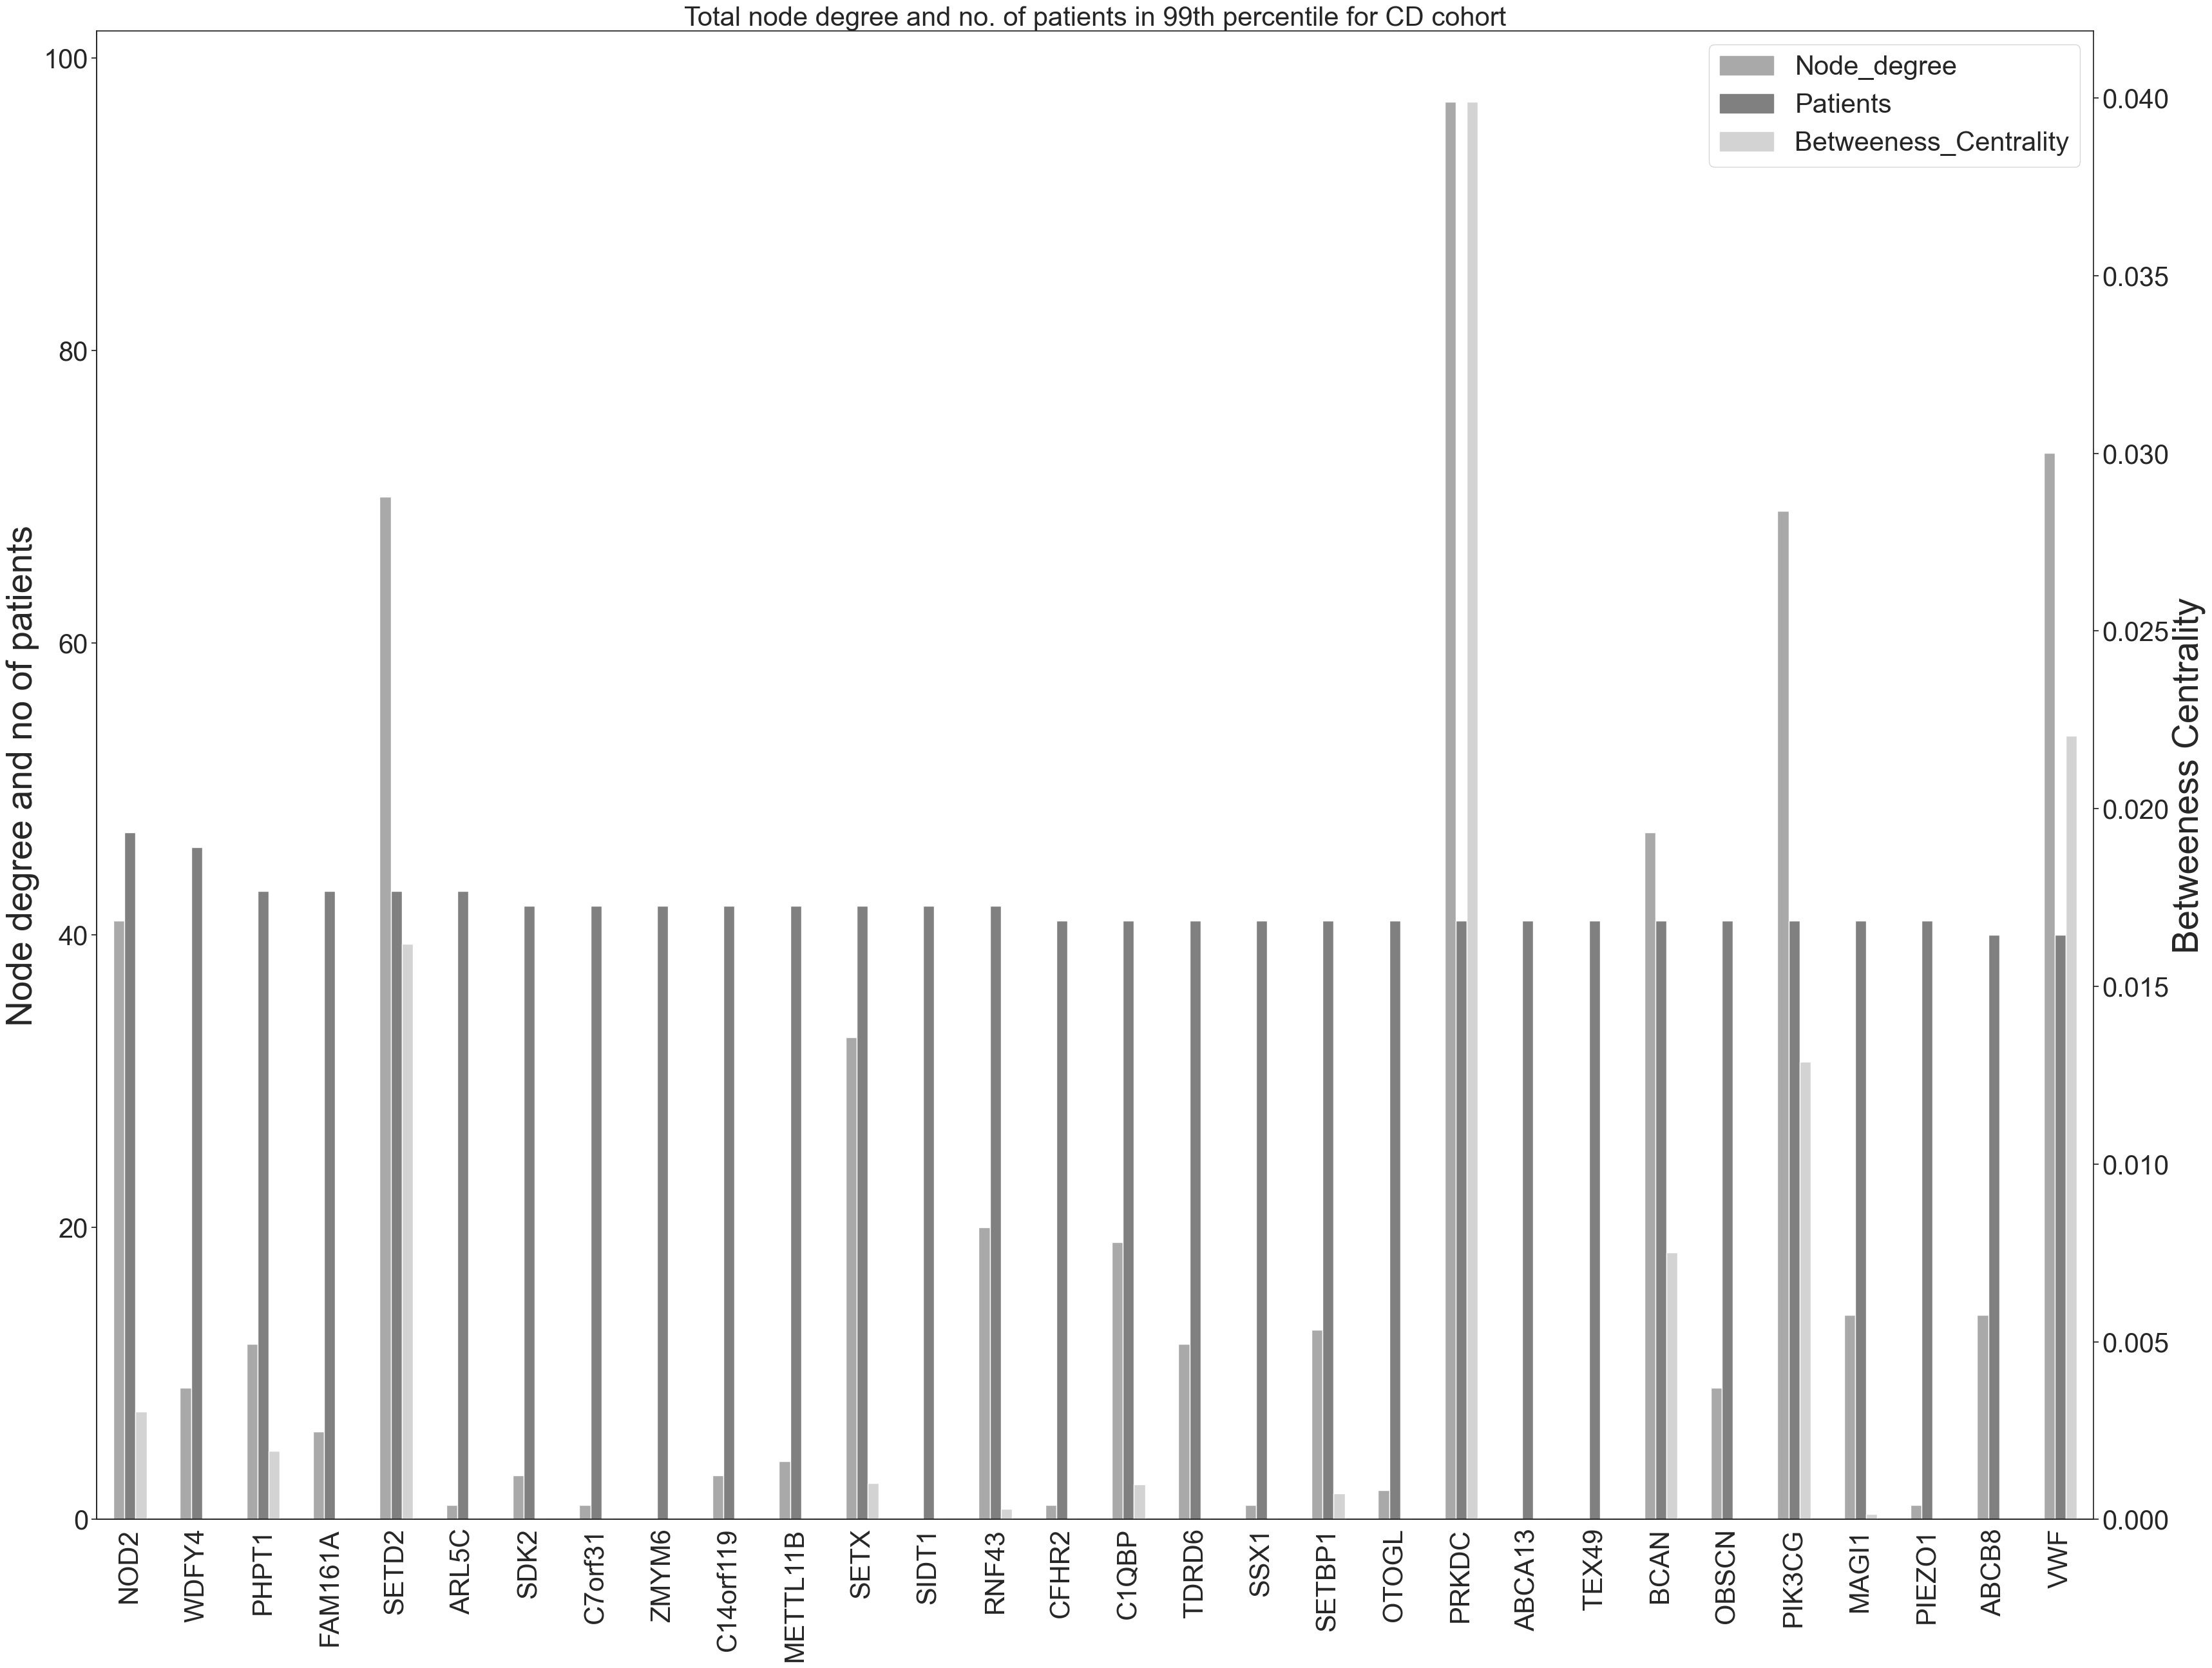

In [62]:
create_degree_barplot_patients(CD_95_MG, CD_bin_95, CD_95_GL)

In [ ]:
def create_degree_barplot_patients(multigraph, dataset, graph_list):
    from get_network_analysis import get_total_degree_from_multigraph
    bin_95_sum_topND = dataset.sum().sort_values(ascending=False).head(30)
    MG_95_ND_top = get_total_degree_from_multigraph(multigraph)[bin_95_sum_topND.index]
    GL_95_BC = betweeness_centrality(CD_95_GL)[bin_95_sum_topND.index].sum().T
    
    df = pd.concat([MG_95_ND_top, bin_95_sum_topND, GL_95_BC], axis=1)
    df.columns = ["Node_degree", "Patients", "Betweeness_Centrality"]
    
    x = np.arange(len(df.index))
    width = 0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, df["Node_degree"], width, label='Men')
    rects2 = ax.bar(x + width/2, women_means, width, label='Women')
    rects3 = 
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

In [ ]:
fig, ax = plt.subplots()


### df testing

In [17]:
from get_network_analysis import get_total_degree_from_multigraph
bin_95_sum_topND = CD_bin_95.sum().sort_values(ascending=False).head(30)
MG_95_ND_top = get_total_degree_from_multigraph(CD_95_MG)[bin_95_sum_topND.index]
GL_95_BC = betweeness_centrality(CD_95_GL)[bin_95_sum_topND.index].sum().T

In [18]:
    
df = pd.concat([MG_95_ND_top, bin_95_sum_topND, GL_95_BC], axis=1)
df.columns = ["Total Node degree", "No. of Patients", "Betweeness Centrality"]
df   

,Total Node degree,No. of Patients,Betweeness Centrality
NOD2,41,47,0.003040
WDFY4,9,46,0.000000
PHPT1,12,43,0.001930
FAM161A,6,43,0.000000
SETD2,70,43,0.016206
ARL5C,1,43,0.000000
SDK2,3,42,0.000000
C7orf31,1,42,0.000000
ZMYM6,0,42,0.000000
C14orf119,3,42,0.000000


## Networks displaying patient numbers on edge weight
### NOD2 only
Create df

In [1]:
import get_network_analysis
import py4cytoscape as py4
import pandas as pd

In [10]:
NOD2_edge = get_network_analysis.count_patient_edges(get_network_analysis.CD_95_MG, gene='NOD2')
NOD2_edge

,source,target,Patients
1097,NOD2,ERBIN,3
1103,NOD2,LRRK2,3
1111,NOD2,TLR5,3
1112,NOD2,TLR4,3
2060,NOD2,HSP90AA1,2
2061,NOD2,NOD1,2
2063,NOD2,VIM,2
2069,NOD2,TLR2,2
2070,NOD2,DDX58,2
27606,NOD2,MAP2K3,1


import df to cyctoscape 

In [11]:
node_list = pd.unique(NOD2_edge[['source', 'target']].values.ravel('K'))
subgraph = get_network_analysis.CD_95_MG.subgraph(node_list)
py4.create_network_from_networkx(subgraph)

Applying default style...
Applying preferred layout


{'networkSUID': 25591}

In [9]:
# py4.create_network_from_data_frames(edges=NOD2_edge)

Applying default style...
Applying preferred layout


{'networkSUID': 127}

### Top pairwise connection
Create df 

In [6]:
CD_95_edges_df = get_network_analysis.count_patient_edges(get_network_analysis.CD_95_MG)
#CD_95_edges_df = CD_95_edges_df[CD_95_edges_df['Patients']]
CD_95_edges_df = CD_95_edges_df[CD_95_edges_df['Patients']>5]
CD_95_edges_df

,source,target,Patients
0,DSTYK,TMCC2,18
1,PATL2,SPG11,14
2,GCFC2,MRPL19,13
3,PCF11,ANKRD42,11
4,LCE2A,LCE4A,10
5,MYH2,MYH8,10
6,ZNF512,C2orf16,8
7,RAG1,RAG2,8
8,LAMA3,USH2A,6
9,LRIG2,HPSE2,6


import df to cytoscape 
- doesnt work, need to import as multigraph
- remove duplicate edges and import patient numbers as edge table

In [7]:
# py4.create_network_from_data_frames(edges=CD_95_edges_df)

In [8]:
node_list = pd.unique(CD_95_edges_df[['source', 'target']].values.ravel('K'))
subgraph = get_network_analysis.CD_95_MG.subgraph(node_list)
py4.create_network_from_networkx(subgraph)

Applying default style...
Applying preferred layout


{'networkSUID': 15010}

In [9]:
CD_95_edges_df.to_csv("CD_greater_than_4.csv")

## PPI enrichment 
Tests if your network has more interactions than expected

In [ ]:
CD_95_MG.nodes()

In [44]:
import requests ## python -m pip install requests

string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "ppi_enrichment"

##
## Construct the request
##

request_url = "/".join([string_api_url, output_format, method])

##
## Set parameters
##

my_genes = list(CD_95_GL[0].nodes())

params = {

    "identifiers" : "%0d".join(my_genes), # your proteins
    "species" : 9606, # species NCBI identifier 
    "caller_identity" : "Testing_GG" # your app name

}

##
## Call STRING
##

response = requests.post(request_url, data=params)

##
## Parse and print the respons Parse and print the responsee
##

for line in response.text.strip().split("\n"):
    pvalue = line.split("\t")[5]
    print("P-value:", pvalue)

P-value: 0.3215


In [21]:
def get_ppi_enrichment(graph):
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "tsv-no-header"
    method = "ppi_enrichment"

    request_url = "/".join([string_api_url, output_format, method])

    my_genes = list(graph.nodes())
    params = {
        "identifiers" : "%0d".join(my_genes), # your proteins
        "species" : 9606, # species NCBI identifier 
        "caller_identity" : "Testing_GG" # your app name
    }
    
    response = requests.post(request_url, data=params)
    
    for line in response.text.strip().split("\n"):
        pvalue = line.split("\t")[5]
        return(pvalue)

In [23]:
list_of_info = [[graph.name, get_ppi_enrichment(graph), graph.has_node('NOD2')] for graph in CD_95_GL]    

ValueError: Unknown format code 'f' for object of type 'str'

In [55]:
df = pd.DataFrame(list_of_info, columns=['patient_ID', 'ppi_enrichment_p_value', 'Has_NOD2'])

In [56]:
df['ppi_enrichment_p_value'] = pd.to_numeric(df['ppi_enrichment_p_value']) 

In [65]:
pd.options.display.float_format = '{:.8f}'.format

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient_ID              681 non-null    object 
 1   ppi_enrichment_p_value  681 non-null    float64
 2   Has_NOD2                681 non-null    bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 11.4+ KB


In [57]:
df = df.sort_values(by=['ppi_enrichment_p_value'],ascending=True).reset_index(drop=True)

In [66]:
df[df['ppi_enrichment_p_value']<0.05]

,patient_ID,ppi_enrichment_p_value,Has_NOD2
0,SOPR0291,0.00000000,False
1,SOPR0240,0.00000000,False
2,SOPR0247,0.00000160,False
3,SOPR0262,0.00000249,True
4,SOAD0303,0.00001110,False
...,...,...,...
223,SOAD0147,0.04820000,False
224,PR0175,0.04850000,False
225,SOPR0419,0.04940000,False
226,SOPR0471,0.04960000,False


In [63]:
def get_ppi_enrichment_df(G_list):
    list_of_info = [[graph.name, get_ppi_enrichment(graph), graph.has_node('NOD2')] for graph in G_list]
    df = pd.DataFrame(list_of_info, columns=['patient_ID', 'ppi_enrichment_p_value', 'Has_NOD2'])
    df['ppi_enrichment_p_value'] = pd.to_numeric(df['ppi_enrichment_p_value']) 
    return(df.sort_values(by=['ppi_enrichment_p_value'],ascending=True).reset_index(drop=True))

In [86]:
UC_df = get_ppi_enrichment_df(UC_95_GL)

In [87]:
UC_df[UC_df['ppi_enrichment_p_value']<0.05]

,patient_ID,ppi_enrichment_p_value,Has_NOD2
0,SOAD0509,0.00000000,False
1,SOAD0417,0.00000002,False
2,SOAD0283,0.00000003,False
3,SOPR0311,0.00000012,False
4,SOAD0270,0.00000013,False
...,...,...,...
114,SOPR0398,0.04570000,False
115,SOAD0495,0.04700000,False
116,SOPR0343,0.04750000,False
117,RL0007,0.04750000,False


## Pairwise graph

In [100]:
CD_95_edges_df = get_network_analysis.count_patient_edges(UC_95_MG)
#CD_95_edges_df = CD_95_edges_df[CD_95_edges_df['Patients']]
CD_95_edges_df.head(30)

,source,target,Patients
0,NDUFA7,NDUFB9,2
1,CSF1,TEK,2
2,ACOX1,PEX5,2
3,NRAS,RASGRP2,2
4,RHO,ARRB1,2
5,TRIB3,ATF3,2
6,APP,NTRK2,2
7,PPAT,MMS19,2
8,MRPS15,MRPL24,2
9,DNAI1,DNAI2,2


In [97]:
node_list = pd.unique(CD_95_edges_df[['source', 'target']].values.ravel('K'))
subgraph = CD_95_MG.subgraph(node_list)
create_multigraph_network_in_cytoscape(subgraph)

Applying default style...


In commands_post(): No network views selected.


CyError: In commands_post(): No network views selected.

### Create NOD2 graph

In [74]:
import py4cytoscape as py4

In [91]:
NOD2_edge = get_network_analysis.count_patient_edges(CD_95_MG, gene='NOD2')
NOD2_edge

,source,target,Patients
1159,NOD2,ERBIN,3
1160,NOD2,LRRK2,3
1161,NOD2,TLR5,3
1162,NOD2,TLR4,3
5167,NOD2,HSP90AA1,2
5195,NOD2,NOD1,2
5198,NOD2,TLR2,2
5200,NOD2,DDX58,2
5201,NOD2,VIM,2
18864,NOD2,TLR3,1


In [65]:
node_list = pd.unique(NOD2_edge[['source', 'target']].values.ravel('K'))
subgraph = CD_95_MG.subgraph(node_list)
subgraph.nodes

NodeView(('TLR1', 'NLRP1', 'TLR5', 'DDX58', 'TBK1', 'ERBIN', 'LRRK2', 'MAP2K3', 'RIPK2', 'HSP90AA1', 'RNF31', 'IRAK2', 'NOD2', 'TLR3', 'NOD1', 'VIM', 'TLR4', 'TLR2', 'SHARPIN'))

In [71]:
def get_gene_as_Series(df, gene):
    '''
    function to return individual patient data, can use patientID or index number. Output is a series.
    
    Parameters
    ----------
    
    
    Returns
    -------
    
    '''
    if type(gene) == str:     # checks if patientID input is string or integer
        patient_series = df.loc[:,gene]
    else:
        patient_series = df.iloc[:,gene]
    # creates an extra column
    # x['gene'] = x.index
    return patient_series

def get_patients_above_zero_as_series(df, gene):
    '''
    function to return series above 0, can use patientID or index number. Output is a series.
    
    Parameters
    ----------
    
    
    Returns
    -------
    '''
    patient_series_bool = get_gene_as_Series(df, gene) > 0
    patient_series_grt_zero = get_gene_as_Series(df, gene).iloc[np.where(patient_series_bool)[0]]
    return list(patient_series_grt_zero.index)



In [75]:
def create_multigraph_network_in_cytoscape(multigraph, diagnosis='CD'):
    edge_df = pd.DataFrame([[u, v, data['name'], data['weight']] for u, v, data in multigraph.edges.data()])
    edge_df['4'] = diagnosis
    edge_df['5'] = 'pp'
    edge_df.columns = ['source', 
                       'target',
                       'patientID', 
                       'weight',
                       'diagnosis',
                       'interaction']
    node_df = pd.DataFrame(pd.unique(edge_df[['source', 'target']].values.ravel('K')))
    node_df = pd.concat([node_df, pd.Series([get_patients_above_zero_as_series(CD_bin_95, i) for i in node_df[0]])], axis=1)
    node_df.columns = ['id','patient_name']
    return py4.create_network_from_data_frames(nodes=node_df, edges=edge_df)

In [76]:
create_multigraph_network_in_cytoscape(subgraph)

Applying default style...
Applying preferred layout


{'networkSUID': 127}

## Enrichment analysis from string API

In [42]:
import json

def get_functional_enrichment(graph):
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "json"
    method = "enrichment"

    request_url = "/".join([string_api_url, output_format, method])

    my_genes = list(graph.nodes())
    params = {
        "identifiers" : "%0d".join(my_genes), # your proteins
        "species" : 9606, # species NCBI identifier 
        "caller_identity" : "Testing_GG" # your app name
    }
    
    response = requests.post(request_url, data=params)

    data = json.loads(response.text)

    for row in data:

        term = row["term"]
        preferred_names = ",".join(row["preferredNames"])
        fdr = float(row["fdr"])
        description = row["description"]
        category = row["category"]
        
        print("\t".join([term, str(fdr), description, category]))
        """
        
        if category == "Process" or "" :
            ## print significant GO Process annotations
            print("\t".join([term, preferred_names, str(fdr), description]))
        """

In [40]:
top_ppi_en = get_network_analysis.get_patient_graph('PR0200', CD_95_GL)

In [49]:
CD_95_GL[0].has_node("NOD2")

False

In [54]:
for i in CD_95_GL:
    if i.has_node('NOD2'):
        print(i.name)
        print(f"Has NOD2: {i.has_node('NOD2')}")
        get_functional_enrichment(i)
    else:
        continue

SOPR0345
Has NOD2: True
KW-0621	1.4e-09	Polymorphism	Keyword
KW-0106	0.0015	Calcium	Keyword
KW-0677	0.0026	Repeat	Keyword
SOAD0512
Has NOD2: True
GO:0110165	0.024	Cellular anatomical entity	Component
GO:0005604	0.0343	Basement membrane	Component
GO:0046872	0.0202	Metal ion binding	Function
KW-0621	2.3e-10	Polymorphism	Keyword
KW-0677	0.0015	Repeat	Keyword
KW-0130	0.0248	Cell adhesion	Keyword
PR0177
Has NOD2: True
KW-0621	9.24e-09	Polymorphism	Keyword
KW-0025	0.0228	Alternative splicing	Keyword
KW-0677	0.0228	Repeat	Keyword
SOPR0393
Has NOD2: True
GO:0030097	0.0259	Hemopoiesis	Process
GO:0002520	0.0495	Immune system development	Process
KW-0621	0.00017	Polymorphism	Keyword
KW-0025	0.0362	Alternative splicing	Keyword
PR0200
Has NOD2: True
KW-0621	7.96e-05	Polymorphism	Keyword
KW-0025	0.0165	Alternative splicing	Keyword
EFO:0006841	0.0393	Respiratory disease biomarker	HPO
SOAD0458
Has NOD2: True
KW-0621	1.39e-08	Polymorphism	Keyword
SOPR0409
Has NOD2: True
KW-0621	1.7e-05	Polymorphism	Keyw

In [55]:
for i in CD_95_GL:
    if not i.has_node('NOD2'):
        print(i.name)
        print(f"Has NOD2: {i.has_node('NOD2')}")
        get_functional_enrichment(i)
    else:
        continue

PR0215
Has NOD2: False
KW-0621	4.01e-05	Polymorphism	Keyword
KW-0597	8.03e-05	Phosphoprotein	Keyword
KW-0025	0.041	Alternative splicing	Keyword
PR0201
Has NOD2: False
KW-0677	0.0035	Repeat	Keyword
KW-0621	0.021	Polymorphism	Keyword
KW-9995	0.021	Disease	Keyword
KW-0025	0.0231	Alternative splicing	Keyword
KW-0597	0.0234	Phosphoprotein	Keyword
KW-0106	0.0333	Calcium	Keyword
HP:0000118	0.0105	Phenotypic abnormality	HPO
SOPR0392
Has NOD2: False
KW-0621	1.19e-05	Polymorphism	Keyword
SOAD0499
Has NOD2: False
GOCC:0015630	0.0499	Microtubule cytoskeleton	COMPARTMENTS
KW-0621	4.16e-05	Polymorphism	Keyword
KW-0175	0.00026	Coiled coil	Keyword
KW-0272	0.0474	Extracellular matrix	Keyword
EFO:0006848	0.0361	Mental or behavioural disorder biomarker	HPO
SOAD0466
Has NOD2: False
KW-0621	0.00016	Polymorphism	Keyword
SOAD0300
Has NOD2: False
GOCC:0005856	0.0448	Cytoskeleton	COMPARTMENTS
GOCC:0015630	0.0448	Microtubule cytoskeleton	COMPARTMENTS
GO:0015630	0.0143	Microtubule cytoskeleton	Component
KW-0677	

In [75]:
import cytoscape

cytoscape.view_networkx_in_cytoscape(top_ppi_en)

You are connected to Cytoscape!
Applying default style...
Applying preferred layout


{'networkSUID': 127}

## Functional annotation from string API

## Get string clusters for a patient 